# **Импорт библиотек**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/Titanic.csv


# **Описание столбцов**
* **PassengerId**: Уникальный индекс/номер строки. Начинается с 1 (для первой строки) и увеличивается на 1 для каждой следующей. Рассматриваем его как индентификатор строки и, что логично, идентификатор пассжира (т.к. для каждого пассажира в датасете представлена только одна строка).
* **Survived**: Признак, показывающий был ли спасен данный пассажир или нет. 1 означает, что удалось выжить, и 0 - не удалось спастись.
* **Pclass**: Класс билета. 1 - означает Первый класс билета. 2 - означает Второй класс билета. 3 - означает Третий класс билета.
* **Name**: Имя пассажира. Имя также может содержать титулы и обращения. "*Mr*" для мужчин. "*Mrs*" для женщин. "*Miss*" для девушек (тут имеется в виду что для тех, кто не замужем, так было принято, да и сейчас тоже, говорить в западном обществе). "*Master*" для юношей.
* **Sex**: Пол пассажира. Либо мужчины (=Male) оибо женщины (=Female).
* **Age**: Возраст пассажира. "NaN" значения в этой колонке означают, что возраст данного пассажира отсутствует/неизвестен/или не был записанv в датасет.
* **SibSp**: Количество братьев/сестер или супругов, путешествующих с каждым пассажиром.
* **Parch**: Если пассажир ребёнок - это количество родителей на борту (Няни не в счёт), а если пассажир взрослый - это количество детей на борту (Number of parents of children travelling with each passenger).
* **Ticket**: Номер билета.
* **Fare**: Сумма, которую заплатил пассажир за путешествие.
* **Cabin**: Номер каюты пассажира. "NaN" значения в этой колонке указавает на то, что номер каюты данного пассажира не был записан.
* **Embarked**: Порт отправления данного пассажира.

In [2]:
titanic = pd.read_csv('/kaggle/input/titanic/Titanic.csv')

In [3]:
titanic = titanic.set_index('PassengerId')
titanic

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# **Вывод количества пустых значений**

In [4]:
NaNs = titanic.isna().sum()
NaNs

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

# **Работа с пустыми значениями**

Заполнение пустых значений поля **AGE**:

Вычислим наиболее вероятный возраст для каждого уникального набора характеристик в таблице и заполним ими пустые значения.

1) Из поля имени предлагаю вывести отдельный столбец под названием **TITLE**, в котором будут записаны титулы в имени.

In [5]:
import re
titanic_full = titanic.copy()
titanic_full['Title'] = titanic_full.Name.apply(lambda x: re.search(', .*\.', x).group().replace(', ', '').replace('.', ''))
titanic_full = titanic_full[['Survived', 'Pclass', 'Name', 'Title', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']]
ph = titanic_full[['Title']].drop_duplicates()
ph

,Title
PassengerId,
1,Mr
2,Mrs
3,Miss
8,Master
31,Don
150,Rev
246,Dr
370,Mme
444,Ms


1.1 Отчистим от лишних значений

In [6]:
ph = titanic_full.loc[titanic_full['Title'] == 'Don']
ph

,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
31,0,1,"Uruchurtu, Don. Manuel E",Don,male,40.0,0,0,PC 17601,27.7208,NaN,C


Uruchurtu, Don. Manuel E -  мексиканский юрист и политик и такое обращение как "Don" действительно используется в Мексике

In [7]:
ph = titanic_full.loc[titanic_full['Title'] == 'Rev']
ph

,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
150,0,2,"Byles, Rev. Thomas Roussel Davids",Rev,male,42.0,0,0,244310,13.000,NaN,S
151,0,2,"Bateman, Rev. Robert James",Rev,male,51.0,0,0,S.O.P. 1166,12.525,NaN,S
250,0,2,"Carter, Rev. Ernest Courtenay",Rev,male,54.0,1,0,244252,26.000,NaN,S
627,0,2,"Kirkland, Rev. Charles Leonard",Rev,male,57.0,0,0,219533,12.350,NaN,Q
849,0,2,"Harper, Rev. John",Rev,male,28.0,0,1,248727,33.000,NaN,S
887,0,2,"Montvila, Rev. Juozas",Rev,male,27.0,0,0,211536,13.000,NaN,S


Rev - титул священника

In [8]:
ph = titanic_full.loc[titanic_full['Title'] == 'Mme']
ph

,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
370,1,1,"Aubart, Mme. Leontine Pauline",Mme,female,24.0,0,0,PC 17477,69.3,B35,C


Mme - Французский титул мадам

In [9]:
ph = titanic_full.loc[titanic_full['Title'] == 'Mlle']
ph

,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
642,1,1,"Sagesser, Mlle. Emma",Mlle,female,24.0,0,0,PC 17477,69.3000,B35,C
711,1,1,"Mayne, Mlle. Berthe Antonine (""Mrs de Villiers"")",Mlle,female,24.0,0,0,PC 17482,49.5042,C90,C


Mlle - Французский титул незамужней женщины

In [10]:
ph = titanic_full.loc[titanic_full['Title'] == 'Col']
ph

,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
648,1,1,"Simonius-Blumer, Col. Oberst Alfons",Col,male,56.0,0,0,13213,35.50,A26,C
695,0,1,"Weir, Col. John",Col,male,60.0,0,0,113800,26.55,NaN,S


Col - воинское звание старшего офицера

In [11]:
titanic_full.loc[titanic_full['Title'] == 'Mrs Martin (Elizabeth L', 'Title'] = "Mrs"

2) Выведем все уникальные комбинации столбоцов **SURVIVED**, **TITLE**, **SEX**, **SIBSP**, **PARCH**, **EMBARKED**, **PCLASS**.
   Намеренно игнорируем столбцы **TICKET**, **FARE**, **NAME** и **CABIN**
   1) **TICKET** - это номер билета уникальный для каждого пассажира, из-за того что он уникален для нас он смысла не имеет.
   2) **FARE** - это цена билета, она уже не уникальна для каждого пассажира, но количество уникальных цен билетов сравнимо с количеством   пассажиров, из-за чего это поле также становиться для нас бесполезно.
   3) **NAME** - имя, уникально для каждого пассажира, из-за того что он уникален для нас он смысла не имеет, всю важную информацию из этого поля мы вынесли в поле **TITLE**
   4) **CABIN** - это номер кабины уникальный для каждого пассажира, из-за того что он уникален для нас он смысла не имеет.

In [12]:
titanic_unique_combinations = titanic_full[['Survived', 'Pclass','Title', 'Sex', 'SibSp', 'Parch', 'Embarked']].drop_duplicates()
titanic_unique_combinations

,Survived,Pclass,Title,Sex,SibSp,Parch,Embarked
PassengerId,,,,,,,
1,0,3,Mr,male,1,0,S
2,1,1,Mrs,female,1,0,C
3,1,3,Miss,female,0,0,S
4,1,1,Mrs,female,1,0,S
5,0,3,Mr,male,0,0,S
...,...,...,...,...,...,...,...
859,1,3,Mrs,female,0,3,C
863,1,1,Mrs,female,0,0,S
867,1,2,Miss,female,1,0,C


У нас 220 уникальных комбинации

3) Пройдёмся по каждой уникальной комбинации и вычислим для каждой наиболее вероятное значение возраста

In [13]:
titanic_unique_combinations_list = sorted(titanic_unique_combinations.values.tolist(), key=lambda x: x[1])
titanic_unique_combinations_list

[[1, 1, 'Mrs', 'female', 1, 0, 'C'],
 [1, 1, 'Mrs', 'female', 1, 0, 'S'],
 [0, 1, 'Mr', 'male', 0, 0, 'S'],
 [1, 1, 'Miss', 'female', 0, 0, 'S'],
 [1, 1, 'Mr', 'male', 0, 0, 'S'],
 [0, 1, 'Mr', 'male', 3, 2, 'S'],
 [0, 1, 'Don', 'male', 0, 0, 'C'],
 [0, 1, 'Mr', 'male', 1, 0, 'C'],
 [0, 1, 'Mr', 'male', 1, 0, 'S'],
 [0, 1, 'Mr', 'male', 0, 1, 'C'],
 [1, 1, 'Miss', 'female', 0, 0, nan],
 [0, 1, 'Mr', 'male', 0, 0, 'C'],
 [1, 1, 'Miss', 'female', 3, 2, 'S'],
 [1, 1, 'Mr', 'male', 0, 1, 'C'],
 [0, 1, 'Mr', 'male', 0, 1, 'S'],
 [1, 1, 'Miss', 'female', 0, 2, 'S'],
 [1, 1, 'Mrs', 'female', 0, 1, 'S'],
 [0, 1, 'Miss', 'female', 0, 0, 'C'],
 [1, 1, 'Mrs', 'female', 0, 0, 'C'],
 [1, 1, 'Miss', 'female', 0, 0, 'C'],
 [1, 1, 'Mr', 'male', 0, 0, 'C'],
 [1, 1, 'Miss', 'female', 1, 0, 'C'],
 [1, 1, 'Mr', 'male', 1, 0, 'S'],
 [0, 1, 'Dr', 'male', 2, 0, 'Q'],
 [1, 1, 'Mr', 'male', 1, 1, 'S'],
 [0, 1, 'Mr', 'male', 1, 1, 'S'],
 [1, 1, 'Miss', 'female', 1, 0, 'S'],
 [0, 1, 'Miss', 'female', 1, 2, 'S'],

Приступаем к вычислениям наиболее вероятного возраста для каждого уникального набора характеристик.

In [14]:
import math
for i in range(len(titanic_unique_combinations_list)):
    placeholder = titanic_full.loc[(titanic_full['Survived'] == titanic_unique_combinations_list[i][0]) & (titanic_full['Pclass'] == titanic_unique_combinations_list[i][1]) & (titanic_full['Title'] == titanic_unique_combinations_list[i][2]) & (titanic_full['Sex'] == titanic_unique_combinations_list[i][3]) & (titanic_full['SibSp'] == titanic_unique_combinations_list[i][4]) & (titanic_full['Parch'] == titanic_unique_combinations_list[i][5]) & (titanic_full['Embarked'] == titanic_unique_combinations_list[i][6])]
    age = placeholder['Age'].mean()
    if not(math.isnan(age)):
        age = float(round(age))
    titanic_unique_combinations_list[i].append(age)
titanic_unique_combinations_list

[[1, 1, 'Mrs', 'female', 1, 0, 'C', 38.0],
 [1, 1, 'Mrs', 'female', 1, 0, 'S', 34.0],
 [0, 1, 'Mr', 'male', 0, 0, 'S', 48.0],
 [1, 1, 'Miss', 'female', 0, 0, 'S', 30.0],
 [1, 1, 'Mr', 'male', 0, 0, 'S', 41.0],
 [0, 1, 'Mr', 'male', 3, 2, 'S', 19.0],
 [0, 1, 'Don', 'male', 0, 0, 'C', 40.0],
 [0, 1, 'Mr', 'male', 1, 0, 'C', 32.0],
 [0, 1, 'Mr', 'male', 1, 0, 'S', 37.0],
 [0, 1, 'Mr', 'male', 0, 1, 'C', 44.0],
 [1, 1, 'Miss', 'female', 0, 0, nan, nan],
 [0, 1, 'Mr', 'male', 0, 0, 'C', 46.0],
 [1, 1, 'Miss', 'female', 3, 2, 'S', 24.0],
 [1, 1, 'Mr', 'male', 0, 1, 'C', 30.0],
 [0, 1, 'Mr', 'male', 0, 1, 'S', 38.0],
 [1, 1, 'Miss', 'female', 0, 2, 'S', 26.0],
 [1, 1, 'Mrs', 'female', 0, 1, 'S', 50.0],
 [0, 1, 'Miss', 'female', 0, 0, 'C', 50.0],
 [1, 1, 'Mrs', 'female', 0, 0, 'C', 44.0],
 [1, 1, 'Miss', 'female', 0, 0, 'C', 36.0],
 [1, 1, 'Mr', 'male', 0, 0, 'C', 33.0],
 [1, 1, 'Miss', 'female', 1, 0, 'C', 36.0],
 [1, 1, 'Mr', 'male', 1, 0, 'S', 37.0],
 [0, 1, 'Dr', 'male', 2, 0, 'Q', 44.0],


4) Заполним таблицу полученными значениями

In [15]:
for i in range(len(titanic_unique_combinations_list)):
    titanic_full.loc[(titanic_full['Survived'] == titanic_unique_combinations_list[i][0]) & (titanic_full['Pclass'] == titanic_unique_combinations_list[i][1]) & (titanic_full['Title'] == titanic_unique_combinations_list[i][2]) & (titanic_full['Sex'] == titanic_unique_combinations_list[i][3]) & (titanic_full['SibSp'] == titanic_unique_combinations_list[i][4]) & (titanic_full['Parch'] == titanic_unique_combinations_list[i][5]) & (titanic_full['Embarked'] == titanic_unique_combinations_list[i][6]) & (titanic_full.Age.apply(math.isnan)), 'Age'] = titanic_unique_combinations_list[i][7]
titanic_full

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",Mr,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Rev,male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,NaN,1,2,W./C. 6607,23.4500,NaN,S


5) Выведем оставшиеся пустые значения

In [16]:
NaNs = titanic_full.isna().sum()
NaNs

Survived      0
Pclass        0
Name          0
Title         0
Sex           0
Age          30
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Осталось ещё 30 пустых значений возраста, выведем их

6. Заполним пустые значения среднем

In [17]:
titanic_full.loc[titanic_full.Age.apply(math.isnan), 'Age'] = titanic_full['Age'].mean()


7. Выведем оставшиеся пустые значения

In [18]:
NaNs = titanic_full.isna().sum()
NaNs

Survived      0
Pclass        0
Name          0
Title         0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Заполнение пустых значений поля **Embarked**:

1. Очистим все два отсутствующих поля

In [19]:
titanic_full = titanic_full.dropna(subset=['Embarked'])
titanic_full

,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.000000,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.000000,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",Mr,male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Rev,male,27.000000,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.000000,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,29.950256,1,2,W./C. 6607,23.4500,NaN,S


2. Выведем оставшиеся пустые значения

In [20]:
NaNs = titanic_full.isna().sum()
NaNs

Survived      0
Pclass        0
Name          0
Title         0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      0
dtype: int64

# ***EDA, ресерч-анализ и Feature Engineering (Начало)***

# **Векторизация**

Для каждого столбца, который я буду векторизовать в изначальной таблице создам дублирующий столбец с векторизованными данными, а позже выделю все векторизованные значения в отдельную таблицу

1. Создание векторизованного столбца **Sex**

0 - male
1 - female

In [21]:
titanic_full['Sex_v'] = titanic_full.apply(lambda row: 0 if row['Sex'] == 'male' else 1, axis=1)
titanic_full

/tmp/ipykernel_38/4150885357.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_full['Sex_v'] = titanic_full.apply(lambda row: 0 if row['Sex'] == 'male' else 1, axis=1)


,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_v
PassengerId,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.000000,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.000000,1,0,113803,53.1000,C123,S,1
5,0,3,"Allen, Mr. William Henry",Mr,male,35.000000,0,0,373450,8.0500,NaN,S,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Rev,male,27.000000,0,0,211536,13.0000,NaN,S,0
888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.000000,0,0,112053,30.0000,B42,S,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,29.950256,1,2,W./C. 6607,23.4500,NaN,S,1


2. Создание векторизованного поля **Title**

2.1. Выведем все возможные значения столбца **Title**

In [22]:
titanic_title_unique = titanic_full[['Title']].drop_duplicates()
titanic_title_unique

,Title
PassengerId,
1,Mr
2,Mrs
3,Miss
8,Master
31,Don
150,Rev
246,Dr
370,Mme
444,Ms


2.2. Подберём для каждого титула соответствующую цифру, где 1 - самая распространённая/наименне социальнозначимая, а 10 наиболее значимая

Список титулов:
1) Mr и Ms - титулы, которые ничего не говорят о положении человека - 1
2) Miss Mlle - незамужняя женщина - 2
3) Mrs и Mme - замужняя женщина - 3
4) Rev - Духовный титул священника - 4
5) Major\Capt - Офицерский чин\Капитан судна (но не титаника) - 5
6) Dr - Учёный\Врач - 6
8) Col - Ещё более страший военный чин - 7
9) Lady, Sir, Don и Jonkheer - Принадлежность к высшему обществу - 8
10) Master - Несовершеннолетний мальчик из высших социальных классов - 9
11) the Countess - Был маркером высшего аристократического статуса, огромного богатства, политического влияния и принадлежности к узкой элите европейского высшего общества - 10

In [23]:
dict_title = {"Mr": 1, "Ms": 1, "Miss": 2, "Mlle": 2, "Mrs": 3, "Mme": 3, "Rev": 4, "Dr": 6, "Major": 5, "Capt": 5, "Col": 7, "Don": 8, "Lady": 8, "Sir": 8, "Jonkheer": 8, "Master": 9, "the Countess": 10}
titanic_full['Title_v'] = titanic_full.apply(lambda row: dict_title[row['Title']], axis=1)
titanic_full

/tmp/ipykernel_38/2243305874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_full['Title_v'] = titanic_full.apply(lambda row: dict_title[row['Title']], axis=1)


,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_v,Title_v
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.000000,1,0,PC 17599,71.2833,C85,C,1,3
3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.000000,1,0,113803,53.1000,C123,S,1,3
5,0,3,"Allen, Mr. William Henry",Mr,male,35.000000,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Rev,male,27.000000,0,0,211536,13.0000,NaN,S,0,4
888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.000000,0,0,112053,30.0000,B42,S,1,2
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,29.950256,1,2,W./C. 6607,23.4500,NaN,S,1,2


3. Создание векторизованного поля **Embarked**

In [24]:
titanic_title_unique = titanic_full[['Embarked']].drop_duplicates()
titanic_title_unique

,Embarked
PassengerId,
1,S
2,C
6,Q


1) S - 1
2) C - 2
3) Q - 3

In [25]:
dict_embarked = {"S": 1, "C": 1, "Q": 2}
titanic_full['Embarked_v'] = titanic_full.apply(lambda row: dict_embarked[row['Embarked']], axis=1)
titanic_full

/tmp/ipykernel_38/3661648730.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_full['Embarked_v'] = titanic_full.apply(lambda row: dict_embarked[row['Embarked']], axis=1)


,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_v,Title_v,Embarked_v
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.000000,1,0,PC 17599,71.2833,C85,C,1,3,1
3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,2,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.000000,1,0,113803,53.1000,C123,S,1,3,1
5,0,3,"Allen, Mr. William Henry",Mr,male,35.000000,0,0,373450,8.0500,NaN,S,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Rev,male,27.000000,0,0,211536,13.0000,NaN,S,0,4,1
888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.000000,0,0,112053,30.0000,B42,S,1,2,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,29.950256,1,2,W./C. 6607,23.4500,NaN,S,1,2,1


4. Создание таблицы с только векторизованными данными

In [26]:
titanic_full_v = titanic_full[['Survived', 'Pclass', 'Title_v', 'Sex_v', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_v']]
titanic_full_v

,Survived,Pclass,Title_v,Sex_v,Age,SibSp,Parch,Fare,Embarked_v
PassengerId,,,,,,,,,
1,0,3,1,0,22.000000,1,0,7.2500,1
2,1,1,3,1,38.000000,1,0,71.2833,1
3,1,3,2,1,26.000000,0,0,7.9250,1
4,1,1,3,1,35.000000,1,0,53.1000,1
5,0,3,1,0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...,...
887,0,2,4,0,27.000000,0,0,13.0000,1
888,1,1,2,1,19.000000,0,0,30.0000,1
889,0,3,2,1,29.950256,1,2,23.4500,1


# **Вывод корреляций**

In [27]:
titanic_full_v.corr()

,Survived,Pclass,Title_v,Sex_v,Age,SibSp,Parch,Fare,Embarked_v
Survived,1.000000,-0.335549,0.284169,0.541585,-0.091894,-0.034040,0.083151,0.255290,0.004536
Pclass,-0.335549,1.000000,-0.073953,-0.127741,-0.381514,0.081656,0.016824,-0.548193,0.220558
Title_v,0.284169,-0.073953,1.000000,0.191345,-0.270156,0.346443,0.320304,0.087604,0.008469
Sex_v,0.541585,-0.127741,0.191345,1.000000,-0.133317,0.116348,0.247508,0.179958,0.075217
Age,-0.091894,-0.381514,-0.270156,-0.133317,1.000000,-0.251989,-0.188491,0.105573,-0.025119
SibSp,-0.034040,0.081656,0.346443,0.116348,-0.251989,1.000000,0.414542,0.160887,-0.026692
Parch,0.083151,0.016824,0.320304,0.247508,-0.188491,0.414542,1.000000,0.217532,-0.081585
Fare,0.255290,-0.548193,0.087604,0.179958,0.105573,0.160887,0.217532,1.000000,-0.116684
Embarked_v,0.004536,0.220558,0.008469,0.075217,-0.025119,-0.026692,-0.081585,-0.116684,1.000000


Выведем корреляций только с полем Survived

In [28]:
sorted(dict(titanic_full_v.select_dtypes(include='number').corr()['Survived']).items(), key=lambda item: item[1], reverse = True)

[('Survived', 1.0),
 ('Sex_v', 0.5415849155511678),
 ('Title_v', 0.28416895648855645),
 ('Fare', 0.2552904613046992),
 ('Parch', 0.08315078366620224),
 ('Embarked_v', 0.004535728723985477),
 ('SibSp', -0.03403999879674893),
 ('Age', -0.09189447779413423),
 ('Pclass', -0.33554885935682505)]

# **Построение графиков**

> ***ГИПОТЕЗА: Проверим все кореляции, составим графики, найдём связанные характеристики, которые кореллируют друг с другом, а также если будут выявлены какие-либо неожиданные связи изучить их причины***

> ***Проверим процент выживших***

38.24521934758155


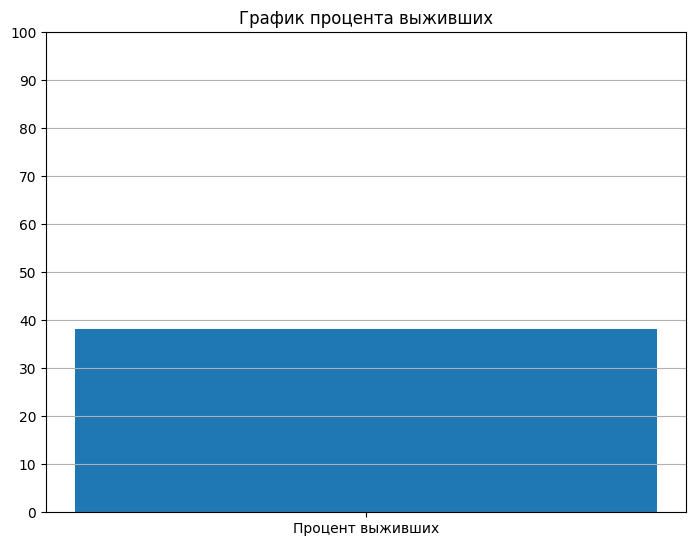

In [29]:
suma = len(titanic_full)
sum_of_survived = len(titanic_full.loc[titanic_full['Survived']==1])

ax = plt.axes([0, 0, 1, 1])

ax.bar(['Процент выживших'], [sum_of_survived*100/suma])
ax.set_title('График процента выживших')
ax.set_yticks(sorted([x for x in range(0, 101, 10)]))
ax.grid(axis='y')
print(sum_of_survived*100/suma)
plt.show()

> ***Проверим поле SEX***

График выживаемости в зависимсоти от поля *Sex*

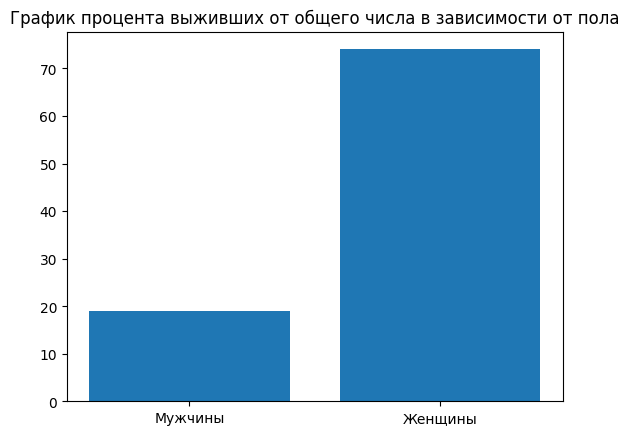

In [30]:
sum_of_males = len(titanic_full.loc[titanic_full['Sex']=='male'])
sum_of_survived_males = len(titanic_full.loc[(titanic_full['Sex']=='male') & (titanic_full['Survived']==1)])
sum_of_females = len(titanic_full.loc[titanic_full['Sex']=='female'])
sum_of_survived_females = len(titanic_full.loc[(titanic_full['Sex']=='female') & (titanic_full['Survived']==1)])

plt.bar(['Мужчины', 'Женщины'], [sum_of_survived_males*100/sum_of_males, sum_of_survived_females*100/sum_of_females])
plt.title('График процента выживших от общего числа в зависимости от пола')
plt.show()

Ожидаемо женщин выжило больше, общеизвестный факт, что им уступали места при эвакуации.
> ***ВЫВОД: Корреляция с полем Sex проверена, ничего неожиданного не нашлось. Женщин выжило больше***

> ***Проверем поле AGE***

График выживших в зависимсоти от поля *Age*

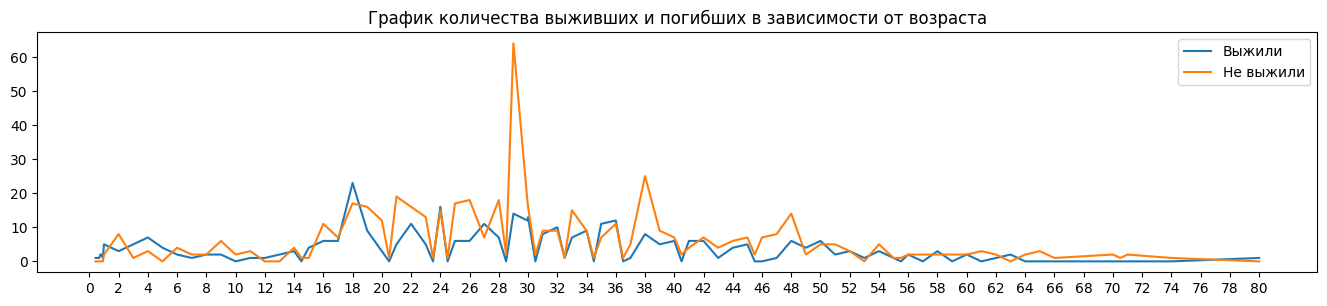

In [31]:
all_ages = sorted(titanic_full['Age'].unique().tolist())
all_ages_survived = []
all_ages_not_survived = []
ax = plt.axes([0, 0, 2, 0.5])
for age in all_ages:
    if not len(titanic_full.loc[(titanic_full['Age'] == age) & (titanic_full['Survived'] == 1)]) == 0 and not len(titanic_full.loc[titanic_full['Age'] == age]) == 0:
        ph = len(titanic_full.loc[(titanic_full['Age'] == age) & (titanic_full['Survived'] == 1)])
    else:
        ph = 0
    all_ages_survived.append(ph)
    if not len(titanic_full.loc[(titanic_full['Age'] == age) & (titanic_full['Survived'] == 0)]) == 0 and not len(titanic_full.loc[titanic_full['Age'] == age]) == 0:
        ph = len(titanic_full.loc[(titanic_full['Age'] == age) & (titanic_full['Survived'] == 0)])
    else:
        ph = 0
    all_ages_not_survived.append(ph)
ax.plot(all_ages, all_ages_survived, label='Выжили')
ax.plot(all_ages, all_ages_not_survived, label='Не выжили')
ax.set_xscale('linear')
ax.set_xticks([x for x in range(0, 81, 2)])
ax.set_title('График количества выживших и погибших в зависимости от возраста')
ax.legend()

plt.show()

Видны скачок погибших в возрасте от 18 до 50 лет, возможно > ***ГИПОТЕЗА: Скачок смертности связан с тем, что большинство людей в возрасте от 18 до 50 года - мужчины***

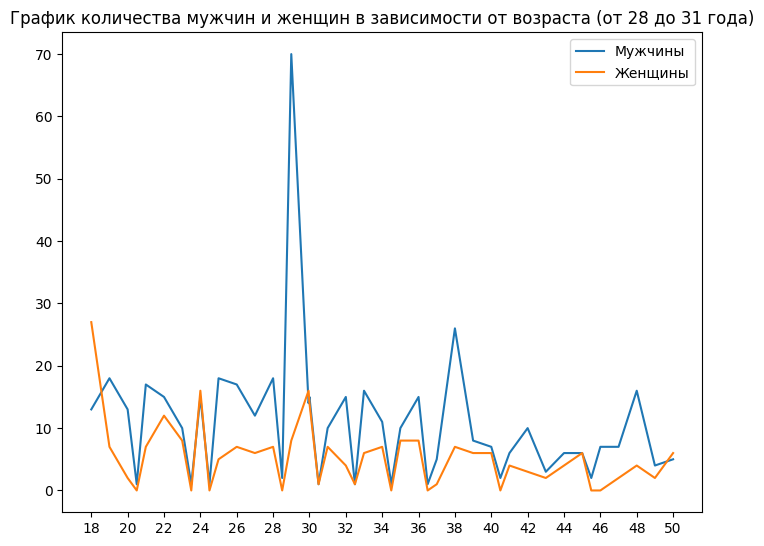

In [32]:
placeholder = titanic_full.loc[(titanic_full['Age'] >= 18) & (titanic_full['Age'] <= 50)]
all_ages = sorted(placeholder['Age'].unique().tolist())
all_ages_survived = []
all_ages_not_survived = []
ax = plt.axes([0, 0, 1, 1])
for age in all_ages:
    if len(placeholder.loc[(placeholder['Age'] == age) & (placeholder['Sex'] == 'male')]) != 0:
        ph = len(placeholder.loc[(placeholder['Age'] == age) & (placeholder['Sex'] == 'male')])
    else:
        ph = 0
    all_ages_survived.append(ph)
    if len(placeholder.loc[(placeholder['Age'] == age) & (placeholder['Sex'] == 'female')]) != 0:
        ph = len(placeholder.loc[(placeholder['Age'] == age) & (placeholder['Sex'] == 'female')])
    else:
        ph = 0
    all_ages_not_survived.append(ph)
ax.plot(all_ages, all_ages_survived, label='Мужчины')
ax.plot(all_ages, all_ages_not_survived, label='Женщины')
ax.set_xscale('linear')
ax.set_xticks([x for x in range(18, 51, 2)])
ax.set_title('График количества мужчин и женщин в зависимости от возраста (от 28 до 31 года)')
ax.legend()

plt.show()

График количества мужчин практически идентичен графику смертности

Модифицируем изначальный график добавив на него линнии показывающие количество мужчин и смертности определённого возраста

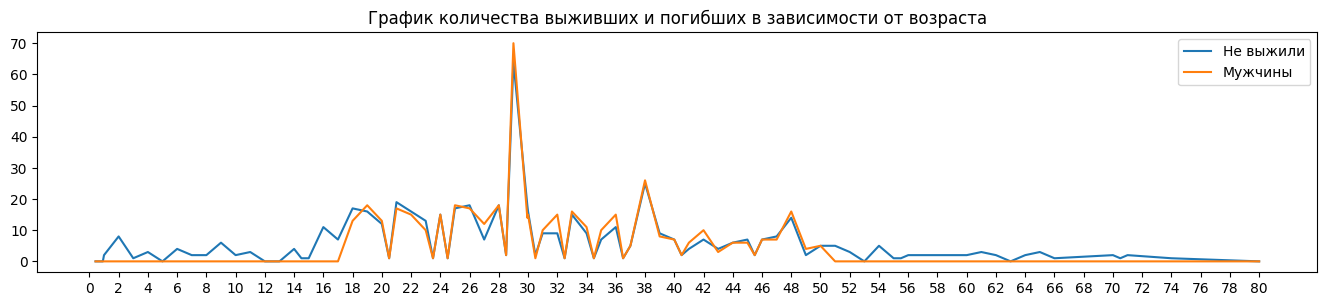

In [33]:
all_ages = sorted(titanic_full['Age'].unique().tolist())
all_ages_survived = []
all_ages_not_survived = []
all_ages_males = []
all_ages_females = []
ax = plt.axes([0, 0, 2, 0.5])
for age in all_ages:
    if not len(titanic_full.loc[(titanic_full['Age'] == age) & (titanic_full['Survived'] == 1)]) == 0:
        ph = len(titanic_full.loc[(titanic_full['Age'] == age) & (titanic_full['Survived'] == 1)])
    else:
        ph = 0
    all_ages_survived.append(ph)
    ph = len(titanic_full.loc[(titanic_full['Age'] == age) & (titanic_full['Survived'] == 0)])
    all_ages_not_survived.append(ph)
    ph = len(placeholder.loc[(placeholder['Age'] == age) & (placeholder['Sex'] == 'male')])
    all_ages_males.append(ph)
    if len(placeholder.loc[(placeholder['Age'] == age) & (placeholder['Sex'] == 'female')]) != 0:
        ph = len(placeholder.loc[(placeholder['Age'] == age) & (placeholder['Sex'] == 'female')])
    else:
        ph = 0
    all_ages_females.append(ph)
ax.plot(all_ages, all_ages_not_survived, label='Не выжили')
ax.plot(all_ages, all_ages_males, label='Мужчины')
ax.set_xscale('linear')
ax.set_xticks([x for x in range(0, 81, 2)])
ax.set_title('График количества выживших и погибших в зависимости от возраста')
ax.legend()

plt.show()

Модифицируем изначальный график добавив на него линнии показывающие количество женщин и выживших определённого возраста

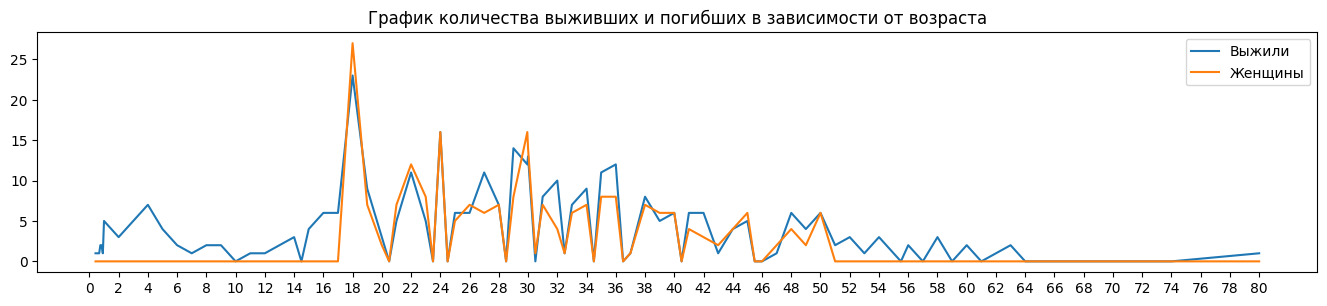

In [34]:
all_ages = sorted(titanic_full['Age'].unique().tolist())
all_ages_survived = []
all_ages_not_survived = []
all_ages_males = []
all_ages_females = []
ax = plt.axes([0, 0, 2, 0.5])
for age in all_ages:
    ph = len(titanic_full.loc[(titanic_full['Age'] == age) & (titanic_full['Survived'] == 1)])
    all_ages_survived.append(ph)
    if not len(titanic_full.loc[(titanic_full['Age'] == age) & (titanic_full['Survived'] == 0)]) == 0 and not len(titanic_full.loc[titanic_full['Age'] == age]) == 0:
        ph = len(titanic_full.loc[(titanic_full['Age'] == age) & (titanic_full['Survived'] == 0)])
    else:
        ph = 0
    all_ages_not_survived.append(ph)
    if len(placeholder.loc[(placeholder['Age'] == age) & (placeholder['Sex'] == 'male')]) != 0:
        ph = len(placeholder.loc[(placeholder['Age'] == age) & (placeholder['Sex'] == 'male')])
    else:
        ph = 0
    all_ages_males.append(ph)
    ph = len(placeholder.loc[(placeholder['Age'] == age) & (placeholder['Sex'] == 'female')])
    all_ages_females.append(ph)
ax.plot(all_ages, all_ages_survived, label='Выжили')
ax.plot(all_ages, all_ages_females, label='Женщины')
ax.set_xscale('linear')
ax.set_xticks([x for x in range(0, 81, 2)])
ax.set_title('График количества выживших и погибших в зависимости от возраста')
ax.legend()

plt.show()

> ***ВЫВОД: Скачки смертности прямо зависят от количества мужчин в пределах каждого возраста.
> Поле AGE практически не влияет на выживаемость, корреляция проверена***

> ***Проверем поле TITLE_V***

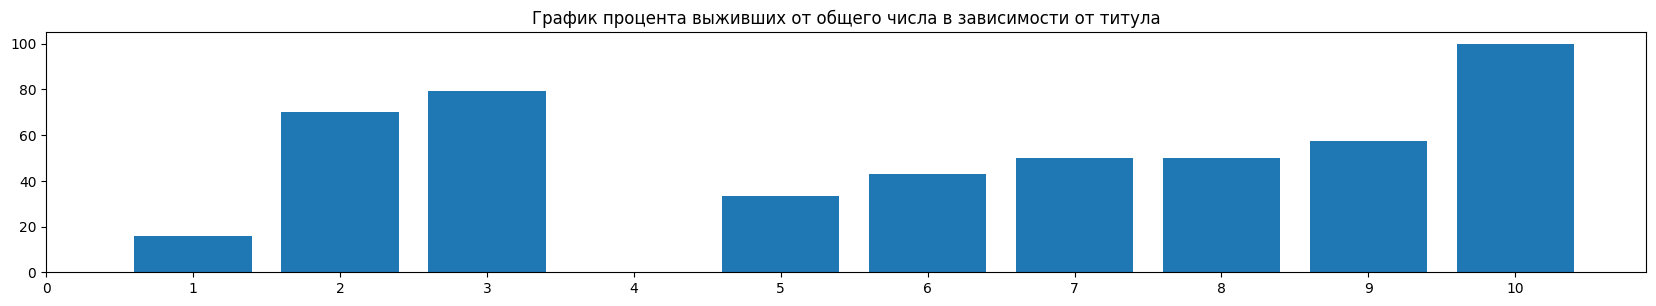

In [35]:
all_titles = sorted(titanic_full['Title_v'].unique().tolist())
heights = []
ax = plt.axes([0, 0, 2.5, 0.5])
for title in all_titles:
    sum_of_title = len(titanic_full.loc[titanic_full['Title_v']==title])
    sum_of_survived_title = len(titanic_full.loc[(titanic_full['Title_v']==title) & (titanic_full['Survived']==1)])
    heights.append(sum_of_survived_title*100/sum_of_title)

ax.bar(all_titles, heights)
ax.set_xticks([x for x in range(0, 11)])
ax.set_title('График процента выживших от общего числа в зависимости от титула')
plt.show()

Список титулов:
1) Mr и Ms - титулы, которые ничего не говорят о положении человека - 1
2) Miss Mlle - незамужняя женщина - 2
3) Mrs и Mme - замужняя женщина - 3
4) Rev - Духовный титул священника - 4
5) Major\Capt - Офицерский чин\Капитан судна (но не титаника) - 5
6) Dr - Учёный\Врач - 6
7) Col - Ещё более страший военный чин - 7
8) Lady, Sir, Don и Jonkheer - Принадлежность к высшему обществу - 8
9) Master - Несовершеннолетний мальчик из высших социальных классов - 9
10) the Countess - Был маркером высшего аристократического статуса, огромного богатства, политического влияния и принадлежности к узкой элите европейского высшего общества - 10

В целом заметен рост выживаемости от менее социально важных к более социально важным титулам, но есть 3 исключения, а именно:
1) 2 - Miss и Mlle - Незамужняя женщина 
2) 3 - Mrs и Mme - Замужняя женщина
3) 4 - Rev - Духовный титул священника

Скачки выживаемости на титулах ценностью 2 и 3 наблюдаются из-за того, что эти титулы исключительно женские, а пол наиболее сильно влияет на выживаемость

Проверим всех людей с титулом Rev

In [36]:
ph = titanic_full.loc[titanic_full['Title'] == 'Rev']
ph

,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_v,Title_v,Embarked_v
PassengerId,,,,,,,,,,,,,,,
150,0,2,"Byles, Rev. Thomas Roussel Davids",Rev,male,42.0,0,0,244310,13.000,NaN,S,0,4,1
151,0,2,"Bateman, Rev. Robert James",Rev,male,51.0,0,0,S.O.P. 1166,12.525,NaN,S,0,4,1
250,0,2,"Carter, Rev. Ernest Courtenay",Rev,male,54.0,1,0,244252,26.000,NaN,S,0,4,1
627,0,2,"Kirkland, Rev. Charles Leonard",Rev,male,57.0,0,0,219533,12.350,NaN,Q,0,4,2
849,0,2,"Harper, Rev. John",Rev,male,28.0,0,1,248727,33.000,NaN,S,0,4,1
887,0,2,"Montvila, Rev. Juozas",Rev,male,27.0,0,0,211536,13.000,NaN,S,0,4,1


Падение выживаемости на титулах ценностью 4 из-за того что: во-первых, все священники - мужчины, а пол сильно влияет на выживаемость; во-вторых, это люди скорее-всего придерживаются высоких моральных стандартов из-за чего не могли покинуть судно раньше других. В доказательство второго пункта привожу информацию из статьи с википедии:
> Томас Байлз дважды отказался от предложения покинуть тонущее судно. Он заявил, что его долг — оставаться на борту «Титаника», пока его проповедническая миссия необходима хотя бы одной живой душе на судне.
https://ru.wikipedia.org/wiki/Байлз,_Томас

Выведем график выживаемости в зависимости от титула исключая титулы ценностью 2, 3 и 4

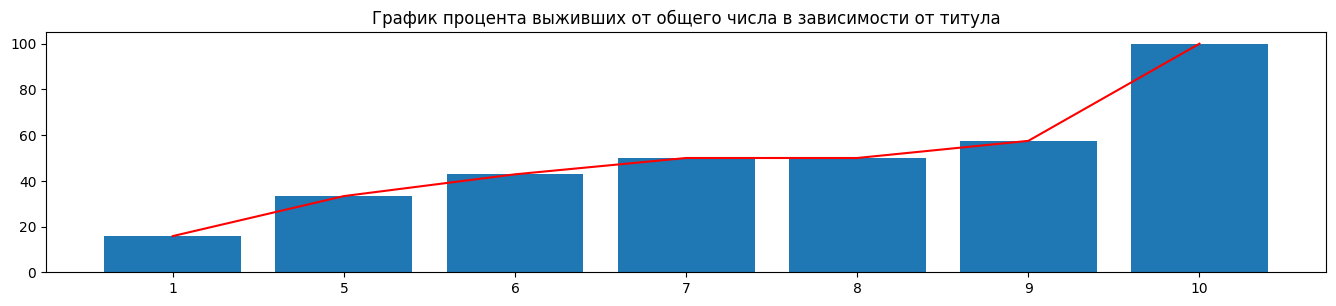

In [37]:
all_titles = sorted(titanic_full['Title_v'].unique().tolist())
all_titles.remove(2)
all_titles.remove(3)
all_titles.remove(4)
heights = []
ax = plt.axes([0, 0, 2, 0.5])
for title in all_titles:
    sum_of_title = len(titanic_full.loc[titanic_full['Title_v']==title])
    sum_of_survived_title = len(titanic_full.loc[(titanic_full['Title_v']==title) & (titanic_full['Survived']==1)])
    heights.append(sum_of_survived_title*100/sum_of_title)

for i in range(len(all_titles)):
    all_titles[i] = str(all_titles[i])
ax.bar(all_titles, heights)
ax.plot(all_titles, heights, color='red')
ax.set_title('График процента выживших от общего числа в зависимости от титула')
plt.show()

> ***ВЫВОД: Поле TITLE_V коррелирует с выживаемостью, причем чем выше социальная значимость, тем больше шансов выжить, за исключением титулов ценностью 2, 3 и 4.
> Титулы ценностью 2 и 3 исключительно женские из-за чего эти титулы превращаются не в маркер социальной значимости, а в маркер пола, а пол как мы выяснили ранее очень сильно влияет на выживаемость.
> Титул ценностю 4 - это титул священника, все из которых решили пожертвовать свои места в шлюпках, ради спасения других людей.***

# **Векторизация (Доработка 1)**

Заменим титулы ценность 3 и 2 на 9 и 8 соответственно, а 4 на 1, чтобы они отображали влияние на выживаемость

In [38]:
dict_title = {"Mr": 2, "Ms": 2, "Miss": 8, "Mlle": 8, "Mrs": 9, "Mme": 9, "Rev": 1, "Dr": 4, "Major": 3, "Capt": 3, "Col": 5, "Don": 6, "Lady": 6, "Sir": 6, "Jonkheer": 6, "Master": 7, "the Countess": 10}
titanic_full['Title_v'] = titanic_full.apply(lambda row: dict_title[row['Title']], axis=1)
titanic_full

/tmp/ipykernel_38/3273605882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_full['Title_v'] = titanic_full.apply(lambda row: dict_title[row['Title']], axis=1)


,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_v,Title_v,Embarked_v
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,2,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.000000,1,0,PC 17599,71.2833,C85,C,1,9,1
3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,8,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.000000,1,0,113803,53.1000,C123,S,1,9,1
5,0,3,"Allen, Mr. William Henry",Mr,male,35.000000,0,0,373450,8.0500,NaN,S,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Rev,male,27.000000,0,0,211536,13.0000,NaN,S,0,1,1
888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.000000,0,0,112053,30.0000,B42,S,1,8,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,29.950256,1,2,W./C. 6607,23.4500,NaN,S,1,8,1


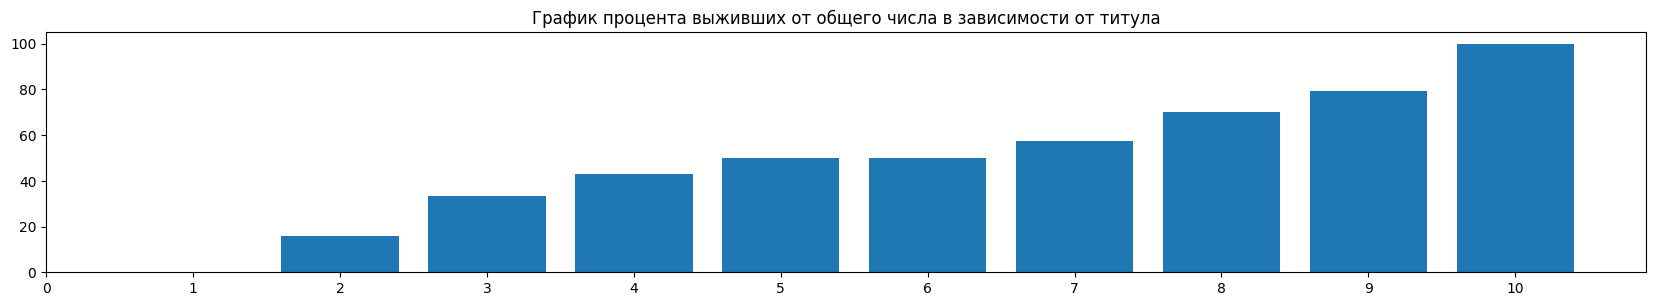

In [39]:
all_titles = sorted(titanic_full['Title_v'].unique().tolist())
heights = []
ax = plt.axes([0, 0, 2.5, 0.5])
for title in all_titles:
    sum_of_title = len(titanic_full.loc[titanic_full['Title_v']==title])
    sum_of_survived_title = len(titanic_full.loc[(titanic_full['Title_v']==title) & (titanic_full['Survived']==1)])
    heights.append(sum_of_survived_title*100/sum_of_title)

ax.bar(all_titles, heights)
ax.set_xticks([x for x in range(0, 11)])
ax.set_title('График процента выживших от общего числа в зависимости от титула')
plt.show()

Изменённый список титулов:
1) Rev - Духовный титул священника - 1
2) Mr и Ms - титулы, которые ничего не говорят о положении человека - 2
3) Major\Capt - Офицерский чин\Капитан судна (но не титаника) - 3
4) Dr - Учёный\Врач - 4
5) Col - Ещё более страший военный чин - 5
6) Lady, Sir, Don и Jonkheer - Принадлежность к высшему обществу - 6
7) Master - Несовершеннолетний мальчик из высших социальных классов - 7
8) Miss Mlle - незамужняя женщина - 8 
9) Mrs и Mme - замужняя женщина - 9
10) the Countess - Был маркером высшего аристократического статуса, огромного богатства, политического влияния и принадлежности к узкой элите европейского высшего общества - 10

# **Построение графиков (Продолжение)**

> ***Проверем поле FARE***

Выведем график разности количества выживших и погибших, для лучшей читаемости графика

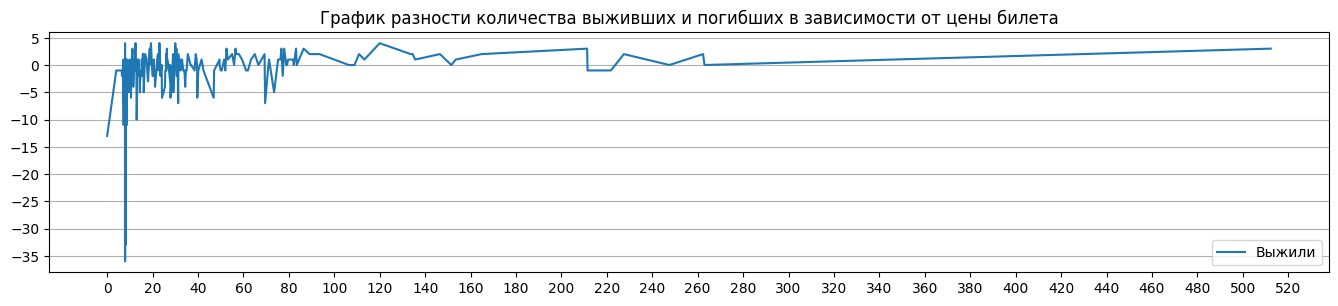

In [40]:
all_fares = sorted(titanic_full['Fare'].unique().tolist())
all_fares_survived = []
all_fares_not_survived = []
ax = plt.axes([0, 0, 2, 0.5])
for fare in all_fares:
    ph = len(titanic_full.loc[(titanic_full['Fare'] == fare) & (titanic_full['Survived'] == 1)])
    all_fares_survived.append(ph)
    ph = len(titanic_full.loc[(titanic_full['Fare'] == fare) & (titanic_full['Survived'] == 0)])
    all_fares_not_survived.append(ph)
for i in range(len(all_fares)):
    all_fares_survived[i] = (all_fares_survived[i] - all_fares_not_survived[i])
ax.plot(all_fares, all_fares_survived, label='Выжили')
ax.set_xscale('linear')
ax.set_xticks([x for x in range(0, 521, 20)])
ax.set_yticks(sorted([x for x in range(-35, 6, 5)]))
ax.set_title('График разности количества выживших и погибших в зависимости от цены билета')
ax.grid(axis='y')
ax.legend()

plt.show()

График плохо читаемый из-за большого количества различных цен билета, округлим цены билетов до целых

In [41]:
titanic_full['Fare_rounded'] = titanic_full.apply(lambda row: round(row['Fare']), axis=1)
titanic_full

/tmp/ipykernel_38/1870152362.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_full['Fare_rounded'] = titanic_full.apply(lambda row: round(row['Fare']), axis=1)


,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_v,Title_v,Embarked_v,Fare_rounded
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,2,1,7
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.000000,1,0,PC 17599,71.2833,C85,C,1,9,1,71
3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,8,1,8
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.000000,1,0,113803,53.1000,C123,S,1,9,1,53
5,0,3,"Allen, Mr. William Henry",Mr,male,35.000000,0,0,373450,8.0500,NaN,S,0,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Rev,male,27.000000,0,0,211536,13.0000,NaN,S,0,1,1,13
888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.000000,0,0,112053,30.0000,B42,S,1,8,1,30
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,29.950256,1,2,W./C. 6607,23.4500,NaN,S,1,8,1,23


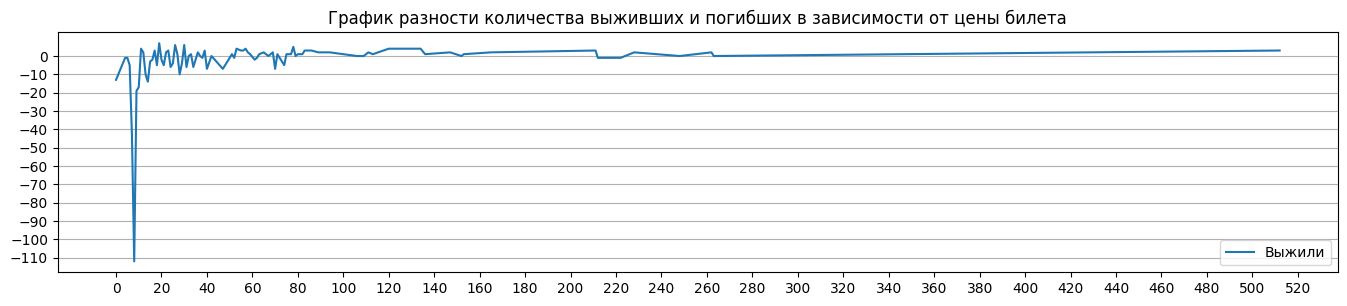

In [42]:
all_fares = sorted(titanic_full['Fare_rounded'].unique().tolist())
all_fares_survived = []
all_fares_not_survived = []
ax = plt.axes([0, 0, 2, 0.5])
for fare in all_fares:
    ph = len(titanic_full.loc[(titanic_full['Fare_rounded'] == fare) & (titanic_full['Survived'] == 1)])
    all_fares_survived.append(ph)
    ph = len(titanic_full.loc[(titanic_full['Fare_rounded'] == fare) & (titanic_full['Survived'] == 0)])
    all_fares_not_survived.append(ph)
for i in range(len(all_fares)):
    all_fares_survived[i] = (all_fares_survived[i] - all_fares_not_survived[i])
ax.plot(all_fares, all_fares_survived, label='Выжили')
ax.set_xscale('linear')
ax.set_xticks([x for x in range(0, 521, 20)])
ax.set_yticks(sorted([x for x in range(-110, 6, 10)]))
ax.set_title('График разности количества выживших и погибших в зависимости от цены билета')
ax.grid(axis='y')
ax.legend()

plt.show()

> ***ВЫВОД: Цена билета не сильно влияет на выживаемость, если у вас не билет с ценою в пределах 10 ед. валюты. Возможности такой скачок смертности из-за того, что низкая цена билета коррелирует с классом пассажира, проверим это при проверке поля PCLASS***

> ***Проверим поле Pclass***

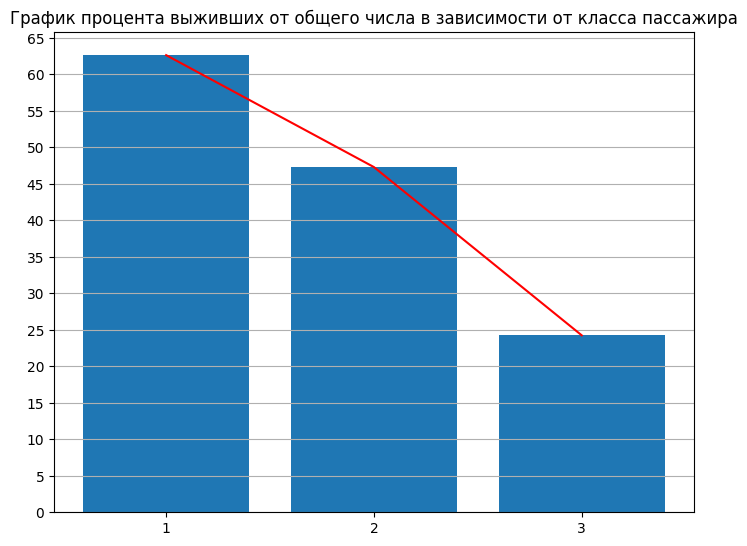

In [43]:
all_pclasses = sorted(titanic_full['Pclass'].unique().tolist())
heights = []
ax = plt.axes([0, 0, 1, 1])
for pclass in all_pclasses:
    sum_of_pclass = len(titanic_full.loc[titanic_full['Pclass']==pclass])
    sum_of_survived_pclass = len(titanic_full.loc[(titanic_full['Pclass']==pclass) & (titanic_full['Survived']==1)])
    heights.append(sum_of_survived_pclass*100/sum_of_pclass)

for i in range(len(all_pclasses)):
    all_pclasses[i] = str(all_pclasses[i])
ax.bar(all_pclasses, heights)
ax.plot(all_pclasses, heights, color='red')
ax.set_yticks([x for x in range(0, 66, 5)])
ax.grid(axis='y')
ax.set_title('График процента выживших от общего числа в зависимости от класса пассажира')
plt.show()

Видно как падает выживаемость, при увеличении класса пассажира, но стоит отметить, что 3й класс - самый неудобный из всех, а 1й наоборот, самый лучший.

Проверим зависимоть PCLASS от FARE

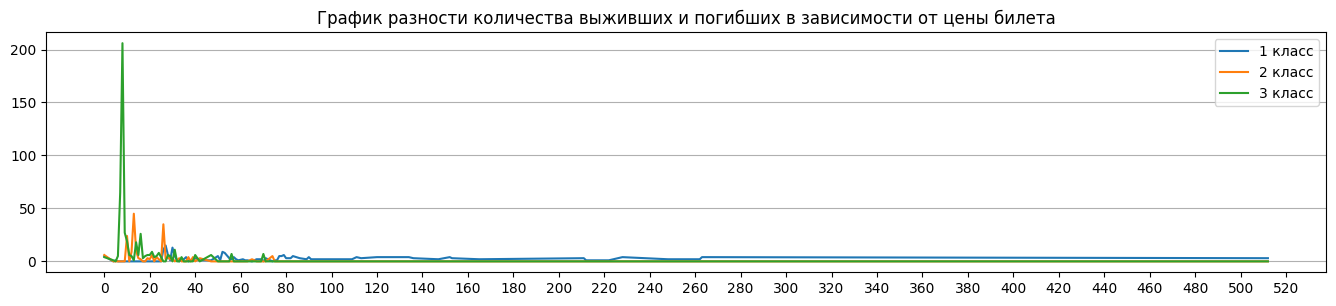

In [44]:
all_fares = sorted(titanic_full['Fare_rounded'].unique().tolist())
all_fares_1 = []
all_fares_2 = []
all_fares_3 = []
ax = plt.axes([0, 0, 2, 0.5])
for fare in all_fares:
    ph = len(titanic_full.loc[(titanic_full['Fare_rounded'] == fare) & (titanic_full['Pclass'] == 1)])
    all_fares_1.append(ph)
    ph = len(titanic_full.loc[(titanic_full['Fare_rounded'] == fare) & (titanic_full['Pclass'] == 2)])
    all_fares_2.append(ph)
    ph = len(titanic_full.loc[(titanic_full['Fare_rounded'] == fare) & (titanic_full['Pclass'] == 3)])
    all_fares_3.append(ph)
ax.plot(all_fares, all_fares_1, label='1 класс')
ax.plot(all_fares, all_fares_2, label='2 класс')
ax.plot(all_fares, all_fares_3, label='3 класс')
ax.set_xscale('linear')
ax.set_xticks([x for x in range(0, 521, 20)])
ax.set_title('График разности количества выживших и погибших в зависимости от цены билета')
ax.grid(axis='y')
ax.legend()

plt.show()

Действительно виден скачок количество билетов 3го класса с ценой около 10 ед. валюты, именно с этим был связан скачок смертности из графика при проверке поля FARE

> ***ВЫВОД: Класс пассажира сильно коррелирует с выживаемостью: чем лучше класс, тем больше шансов выжить. А скачок смертности у билетов с низкой стоимостью действительно связан с тем, что большинство билетов с низкой стоимостью были 3го класса.***

> ***Проверем поле PARCH***

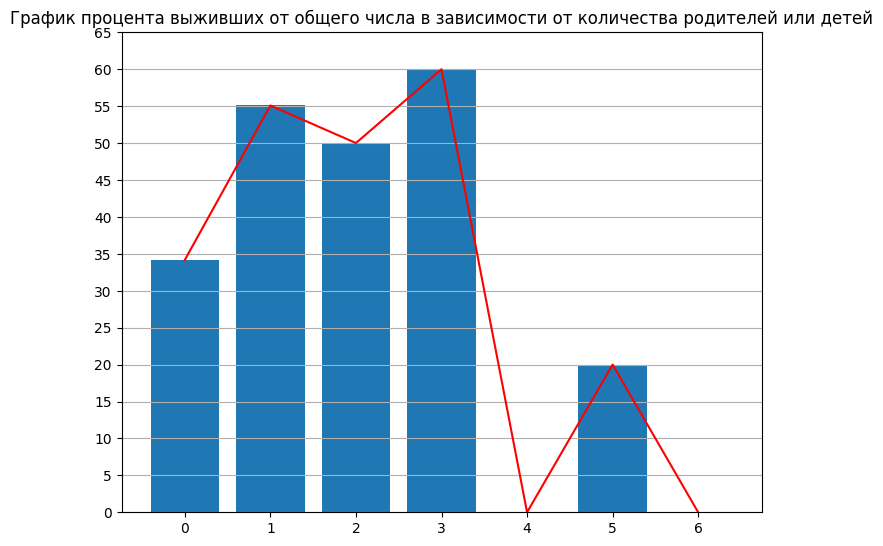

In [45]:
all_parhcs = sorted(titanic_full['Parch'].unique().tolist())
heights = []
ax = plt.axes([0, 0, 1, 1])
for parch in all_parhcs:
    sum_of_parhcs = len(titanic_full.loc[titanic_full['Parch']==parch])
    sum_of_survived_parhcs = len(titanic_full.loc[(titanic_full['Parch']==parch) & (titanic_full['Survived']==1)])
    heights.append(sum_of_survived_parhcs*100/sum_of_parhcs)

for i in range(len(all_parhcs)):
    all_parhcs[i] = str(all_parhcs[i])
ax.bar(all_parhcs, heights)
ax.plot(all_parhcs, heights, color='red')
ax.set_yticks([x for x in range(0, 66, 5)])
ax.grid(axis='y')
ax.set_title('График процента выживших от общего числа в зависимости от количества родителей или детей')
plt.show()

Проверим колчиество детей, процент женщин и класс пассажира для каждого значения поля PARCH.
1) Колчиество детей - важно проверить так как поле Parch для детей и взрослых имеет разное значение
2) Пол сильно коррелирует с выживаемостью
3) Класс пассажира сильно коррелирует с выживаемостю

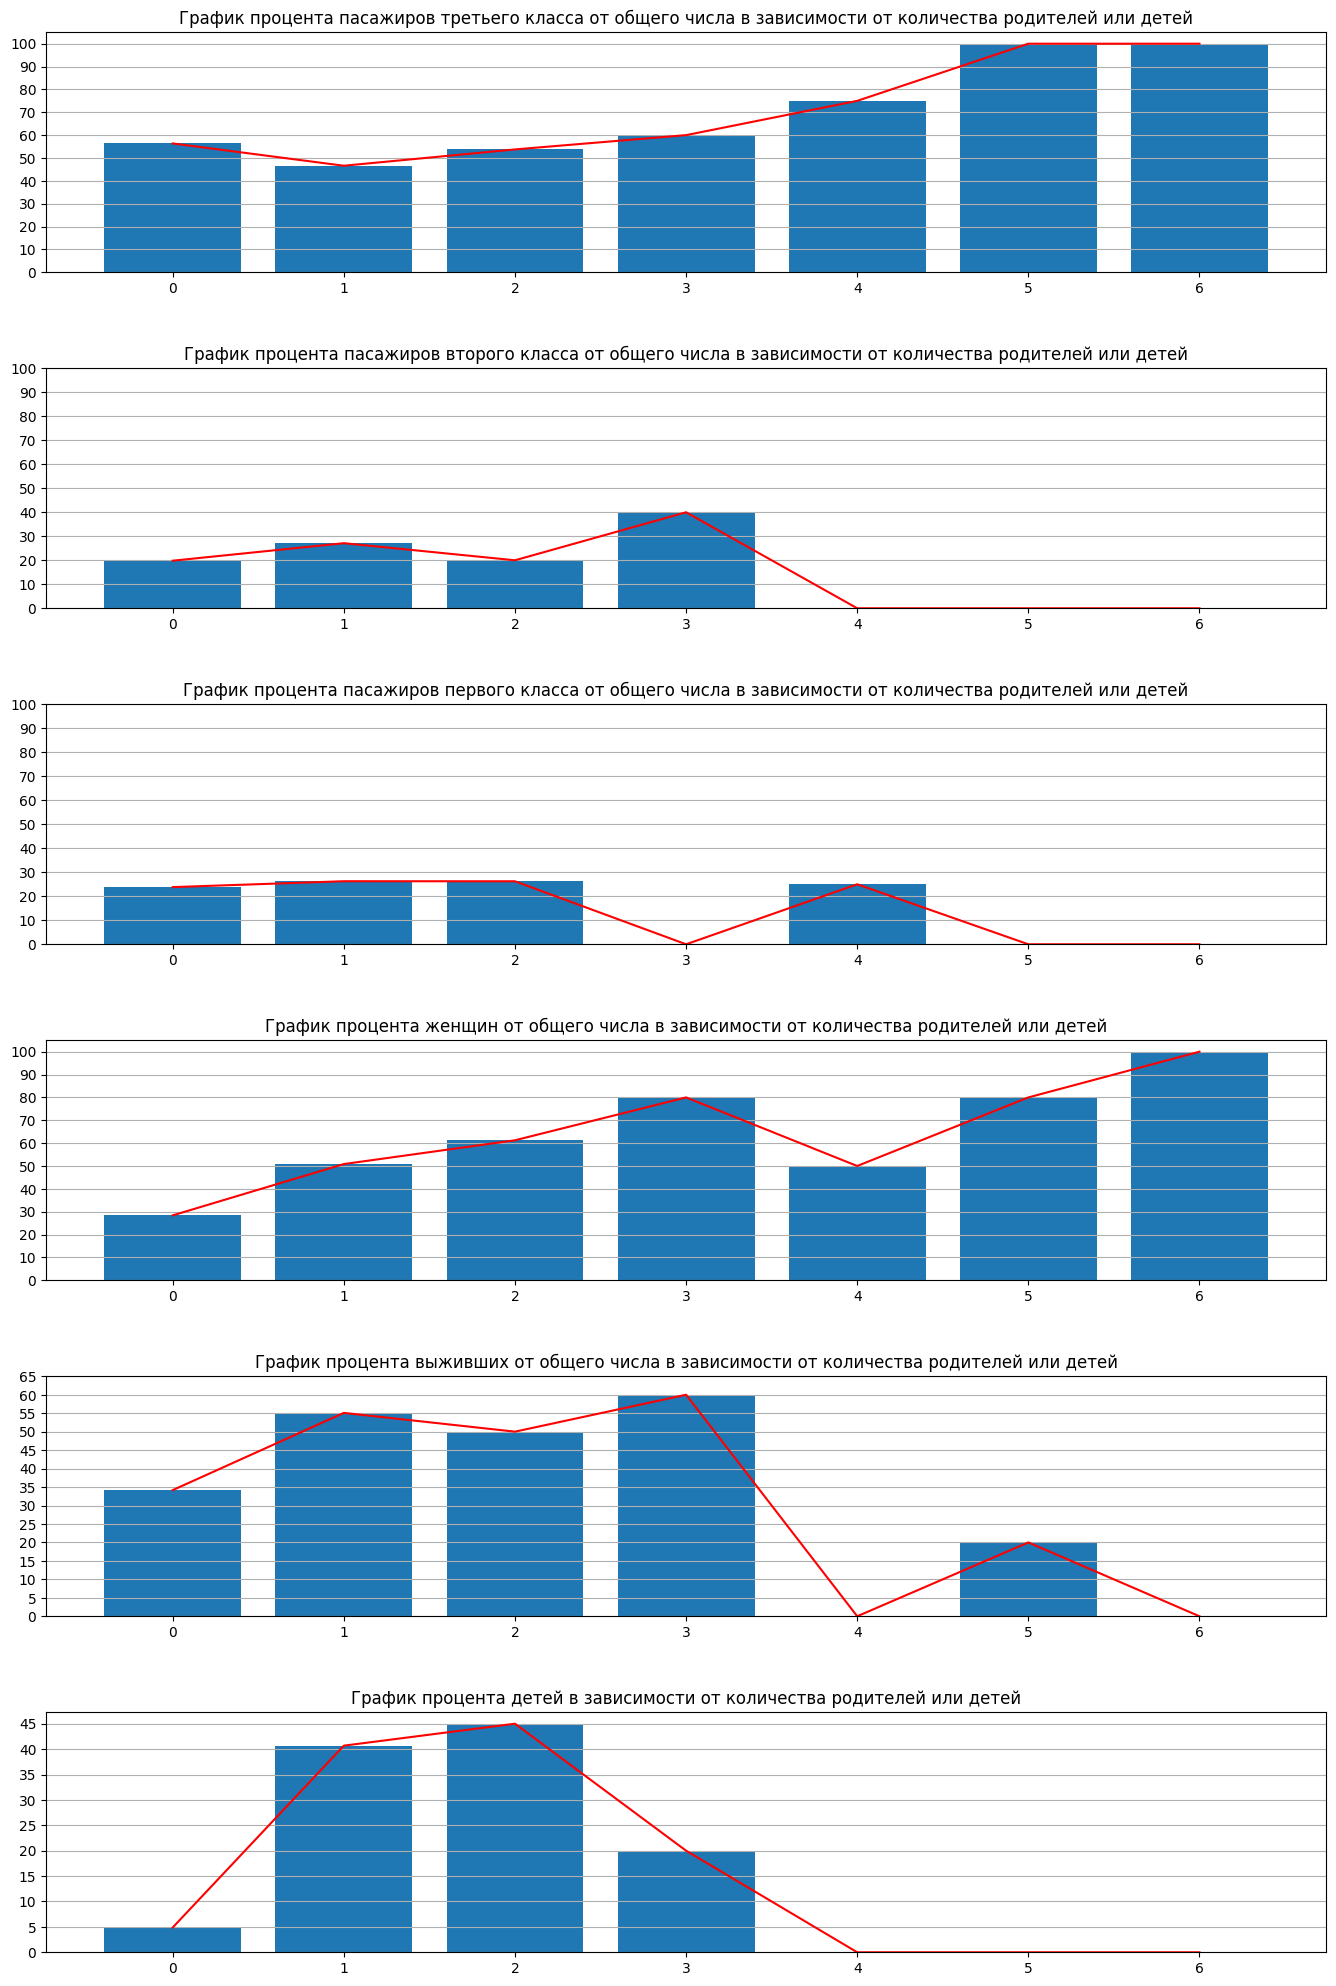

In [46]:
all_parhcs = sorted(titanic_full['Parch'].unique().tolist())
heights = []
ax1 = plt.axes([0, 0, 2, 0.5])
ax2 = plt.axes([0, 0.7, 2, 0.5])
ax3 = plt.axes([0, 1.4, 2, 0.5])
ax4 = plt.axes([0, 2.1, 2, 0.5])
ax5 = plt.axes([0, 2.8, 2, 0.5])
ax6 = plt.axes([0, 3.5, 2, 0.5])

for parch in all_parhcs:
    sum_of_childs = len(titanic_full.loc[(titanic_full['Parch']==parch) & (titanic_full['Age']<18)])
    suma = len(titanic_full.loc[titanic_full['Parch']==parch])
    heights.append(sum_of_childs*100/suma)

for i in range(len(all_parhcs)):
    all_parhcs[i] = str(all_parhcs[i])
ax1.bar(all_parhcs, heights)
ax1.plot(all_parhcs, heights, color='red')
ax1.set_yticks([x for x in range(0, 46, 5)])
ax1.grid(axis='y')
ax1.set_title('График процента детей в зависимости от количества родителей или детей')

all_parhcs = sorted(titanic_full['Parch'].unique().tolist())
heights = []
for parch in all_parhcs:
    sum_of_parhcs = len(titanic_full.loc[titanic_full['Parch']==parch])
    sum_of_survived_parhcs = len(titanic_full.loc[(titanic_full['Parch']==parch) & (titanic_full['Survived']==1)])
    heights.append(sum_of_survived_parhcs*100/sum_of_parhcs)

for i in range(len(all_parhcs)):
    all_parhcs[i] = str(all_parhcs[i])
ax2.bar(all_parhcs, heights)
ax2.plot(all_parhcs, heights, color='red')
ax2.set_yticks([x for x in range(0, 66, 5)])
ax2.grid(axis='y')
ax2.set_title('График процента выживших от общего числа в зависимости от количества родителей или детей')

all_parhcs = sorted(titanic_full['Parch'].unique().tolist())
heights = []
for parch in all_parhcs:
    sum_of_parhcs = len(titanic_full.loc[titanic_full['Parch']==parch])
    sum_of_female_parhcs = len(titanic_full.loc[(titanic_full['Parch']==parch) & (titanic_full['Sex']=='female')])
    heights.append(sum_of_female_parhcs*100/sum_of_parhcs)

for i in range(len(all_parhcs)):
    all_parhcs[i] = str(all_parhcs[i])
ax3.bar(all_parhcs, heights)
ax3.plot(all_parhcs, heights, color='red')
ax3.set_yticks([x for x in range(0, 101, 10)])
ax3.grid(axis='y')
ax3.set_title('График процента женщин от общего числа в зависимости от количества родителей или детей')

all_parhcs = sorted(titanic_full['Parch'].unique().tolist())
heights = []
for parch in all_parhcs:
    sum_of_parhcs = len(titanic_full.loc[titanic_full['Parch']==parch])
    sum_of_female_parhcs = len(titanic_full.loc[(titanic_full['Parch']==parch) & (titanic_full['Pclass']==1)])
    heights.append(sum_of_female_parhcs*100/sum_of_parhcs)

for i in range(len(all_parhcs)):
    all_parhcs[i] = str(all_parhcs[i])
ax4.bar(all_parhcs, heights)
ax4.plot(all_parhcs, heights, color='red')
ax4.set_yticks([x for x in range(0, 101, 10)])
ax4.grid(axis='y')
ax4.set_title('График процента пасажиров первого класса от общего числа в зависимости от количества родителей или детей')

all_parhcs = sorted(titanic_full['Parch'].unique().tolist())
heights = []
for parch in all_parhcs:
    sum_of_parhcs = len(titanic_full.loc[titanic_full['Parch']==parch])
    sum_of_female_parhcs = len(titanic_full.loc[(titanic_full['Parch']==parch) & (titanic_full['Pclass']==2)])
    heights.append(sum_of_female_parhcs*100/sum_of_parhcs)

for i in range(len(all_parhcs)):
    all_parhcs[i] = str(all_parhcs[i])
ax5.bar(all_parhcs, heights)
ax5.plot(all_parhcs, heights, color='red')
ax5.set_yticks([x for x in range(0, 101, 10)])
ax5.grid(axis='y')
ax5.set_title('График процента пасажиров второго класса от общего числа в зависимости от количества родителей или детей')

all_parhcs = sorted(titanic_full['Parch'].unique().tolist())
heights = []
for parch in all_parhcs:
    sum_of_parhcs = len(titanic_full.loc[titanic_full['Parch']==parch])
    sum_of_female_parhcs = len(titanic_full.loc[(titanic_full['Parch']==parch) & (titanic_full['Pclass']==3)])
    heights.append(sum_of_female_parhcs*100/sum_of_parhcs)

for i in range(len(all_parhcs)):
    all_parhcs[i] = str(all_parhcs[i])
ax6.bar(all_parhcs, heights)
ax6.plot(all_parhcs, heights, color='red')
ax6.set_yticks([x for x in range(0, 101, 10)])
ax6.grid(axis='y')
ax6.set_title('График процента пасажиров третьего класса от общего числа в зависимости от количества родителей или детей')
plt.show()

Видно, что те поля Parch, которым соответсвует высокий процент детей, высокий процент женщин и низкий процент пассажиров третьего класса, имеют гораздо больший процент выживаемости, покажем это на более наглядном графике.

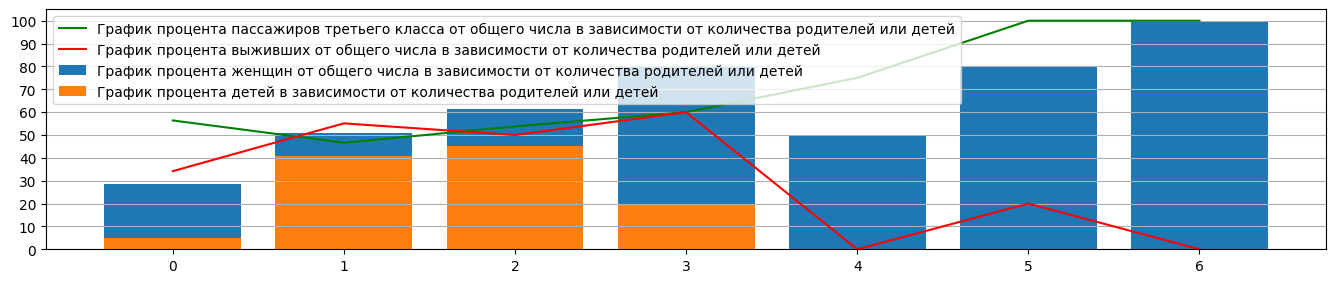

In [47]:
ax1 = plt.axes([0, 0, 2, 0.5])

all_parhcs = sorted(titanic_full['Parch'].unique().tolist())
heights = []
for parch in all_parhcs:
    sum_of_parhcs = len(titanic_full.loc[titanic_full['Parch']==parch])
    sum_of_female_parhcs = len(titanic_full.loc[(titanic_full['Parch']==parch) & (titanic_full['Pclass']==3)])
    heights.append(sum_of_female_parhcs*100/sum_of_parhcs)
for i in range(len(all_parhcs)):
    all_parhcs[i] = str(all_parhcs[i])
ax1.plot(all_parhcs, heights, label = 'График процента пассажиров третьего класса от общего числа в зависимости от количества родителей или детей', color='green')

all_parhcs = sorted(titanic_full['Parch'].unique().tolist())
heights = []
for parch in all_parhcs:
    sum_of_parhcs = len(titanic_full.loc[titanic_full['Parch']==parch])
    sum_of_female_parhcs = len(titanic_full.loc[(titanic_full['Parch']==parch) & (titanic_full['Sex']=='female')])
    heights.append(sum_of_female_parhcs*100/sum_of_parhcs)
for i in range(len(all_parhcs)):
    all_parhcs[i] = str(all_parhcs[i])
ax1.bar(all_parhcs, heights, label = 'График процента женщин от общего числа в зависимости от количества родителей или детей')

all_parhcs = sorted(titanic_full['Parch'].unique().tolist())
heights = []
for parch in all_parhcs:
    sum_of_parhcs = len(titanic_full.loc[titanic_full['Parch']==parch])
    sum_of_survived_parhcs = len(titanic_full.loc[(titanic_full['Parch']==parch) & (titanic_full['Survived']==1)])
    heights.append(sum_of_survived_parhcs*100/sum_of_parhcs)

for i in range(len(all_parhcs)):
    all_parhcs[i] = str(all_parhcs[i])
ax1.plot(all_parhcs, heights, label='График процента выживших от общего числа в зависимости от количества родителей или детей', color='red')

all_parhcs = sorted(titanic_full['Parch'].unique().tolist())
heights = []
for parch in all_parhcs:
    sum_of_childs = len(titanic_full.loc[(titanic_full['Parch']==parch) & (titanic_full['Age']<18)])
    suma = len(titanic_full.loc[titanic_full['Parch']==parch])
    heights.append(sum_of_childs*100/suma)

for i in range(len(all_parhcs)):
    all_parhcs[i] = str(all_parhcs[i])
ax1.bar(all_parhcs, heights, label='График процента детей в зависимости от количества родителей или детей')
ax1.set_yticks([x for x in range(0, 101, 10)])
ax1.grid(axis='y')
ax1.legend()
plt.show()

> ***ВЫВОД: Само поле PARCH слабо коррелирует с выживаемостью, но те значения Parch, в которых процент детей и женщин, довольно высок, а процент пассажиров третьего класса низок, имеют также высокий процент выживаемости. PARCH слабо коррелирует с выживаемостью, а скачки выживаемости связаны лишь с высоким процентом других характеристик вляющих на выживание***

> ***Проверим поле EMBARKED***

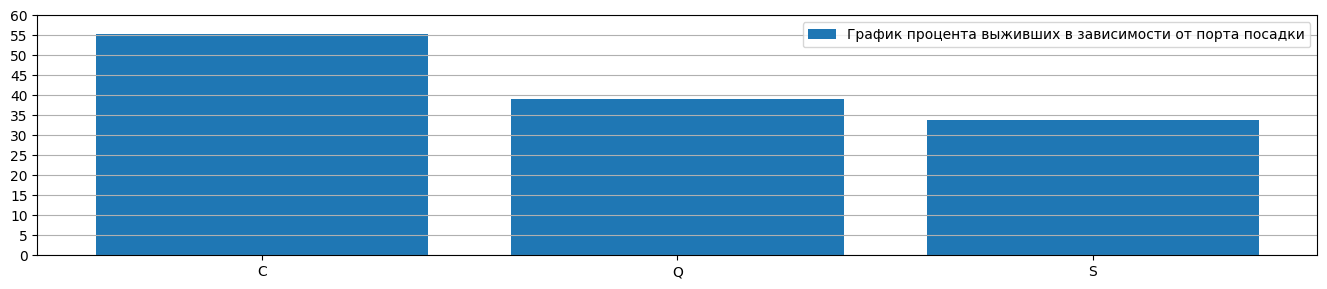

In [48]:
ax1 = plt.axes([0, 0, 2, 0.5])
all_embarkeds = sorted(titanic_full['Embarked'].unique().tolist())
heights = []
for embarked in all_embarkeds:
    sum_of_survived_embarkeds = len(titanic_full.loc[(titanic_full['Embarked']==embarked) & (titanic_full['Survived']==1)])
    sum_of_embarkeds = len(titanic_full.loc[titanic_full['Embarked']==embarked])
    heights.append(sum_of_survived_embarkeds*100/sum_of_embarkeds)

for i in range(len(all_embarkeds)):
    all_embarkeds[i] = str(all_embarkeds[i])
ax1.bar(all_embarkeds, heights, label='График процента выживших в зависимости от порта посадки')
ax1.set_yticks([x for x in range(0, 61, 5)])
ax1.grid(axis='y')
ax1.legend()
plt.show()

Проверим корреляцию каждого порта с ключевыми характеристиками, влияющими на выживаемость - полом и классом пассажиров.

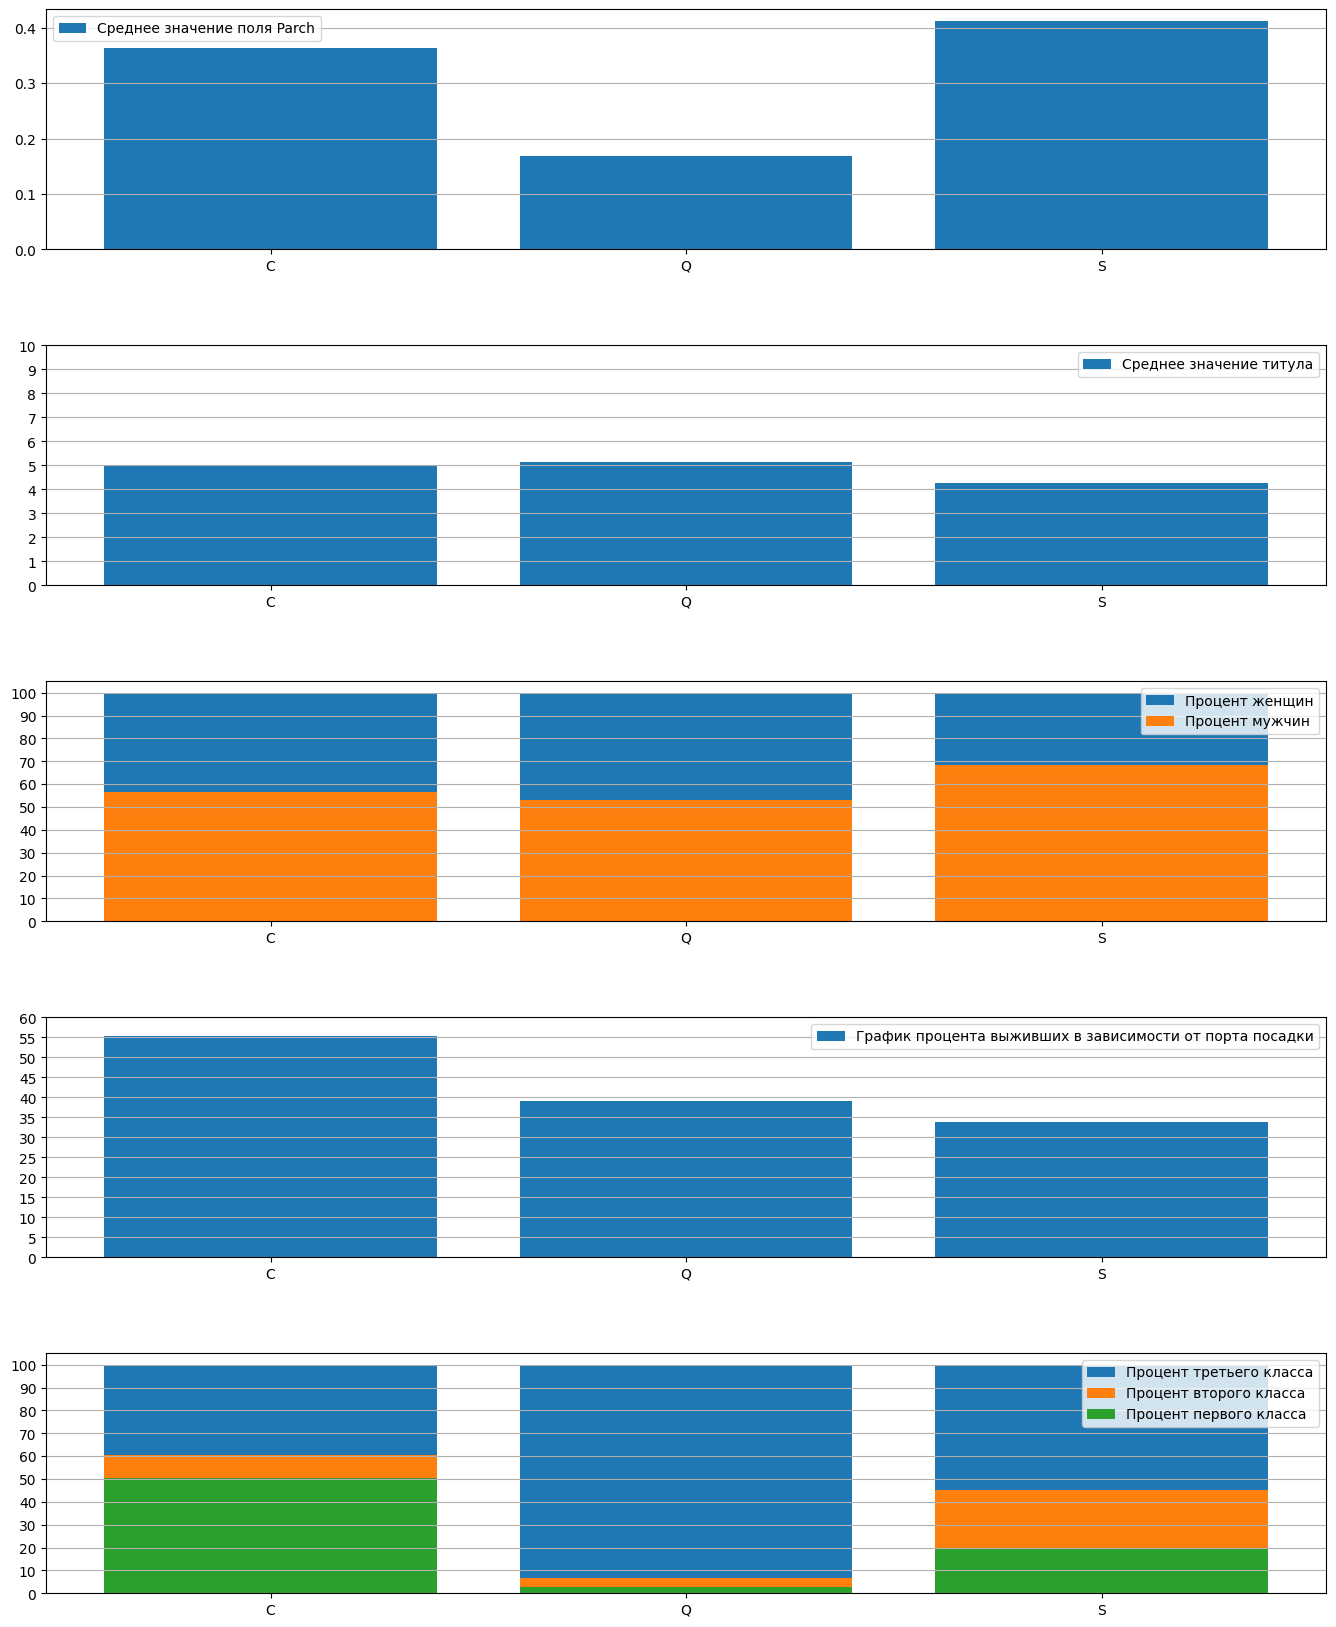

In [49]:
ax1 = plt.axes([0, 0, 2, 0.5])
all_embarkeds = sorted(titanic_full['Embarked'].unique().tolist())
heights1 = []
heights2 = []
heights3 = []
for embarked in all_embarkeds:
    sum_of_embarkeds = len(titanic_full.loc[titanic_full['Embarked']==embarked])
    sum_of_1_embarkeds = len(titanic_full.loc[(titanic_full['Embarked']==embarked) & (titanic_full['Pclass']==1)])
    sum_of_2_embarkeds = len(titanic_full.loc[(titanic_full['Embarked']==embarked) & (titanic_full['Pclass']==2)])
    sum_of_3_embarkeds = len(titanic_full.loc[(titanic_full['Embarked']==embarked) & (titanic_full['Pclass']==3)])
    heights1.append(sum_of_1_embarkeds*100/sum_of_embarkeds)
    heights2.append(sum_of_2_embarkeds*100/sum_of_embarkeds)
    heights3.append(sum_of_3_embarkeds*100/sum_of_embarkeds)

for i in range(len(all_embarkeds)):
    all_embarkeds[i] = str(all_embarkeds[i])
    heights2[i] = heights2[i] + heights1[i]
    heights3[i] = heights3[i] + heights2[i]

ax1.bar(all_embarkeds, heights3, label='Процент третьего класса')
ax1.bar(all_embarkeds, heights2, label='Процент второго класса')
ax1.bar(all_embarkeds, heights1, label='Процент первого класса')
ax1.set_yticks([x for x in range(0, 101, 10)])
ax1.grid(axis='y')
ax1.legend()

ax2 = plt.axes([0, 0.7, 2, 0.5])
all_embarkeds = sorted(titanic_full['Embarked'].unique().tolist())
heights = []
for embarked in all_embarkeds:
    sum_of_survived_embarkeds = len(titanic_full.loc[(titanic_full['Embarked']==embarked) & (titanic_full['Survived']==1)])
    sum_of_embarkeds = len(titanic_full.loc[titanic_full['Embarked']==embarked])
    heights.append(sum_of_survived_embarkeds*100/sum_of_embarkeds)

for i in range(len(all_embarkeds)):
    all_embarkeds[i] = str(all_embarkeds[i])
ax2.bar(all_embarkeds, heights, label='График процента выживших в зависимости от порта посадки')
ax2.set_yticks([x for x in range(0, 61, 5)])
ax2.grid(axis='y')
ax2.legend()

ax3 = plt.axes([0, 1.4, 2, 0.5])
all_embarkeds = sorted(titanic_full['Embarked'].unique().tolist())
heights_male = []
heights_female = []
for embarked in all_embarkeds:
    sum_of_male_embarkeds = len(titanic_full.loc[(titanic_full['Embarked']==embarked) & (titanic_full['Sex']=='male')])
    sum_of_embarkeds = len(titanic_full.loc[titanic_full['Embarked']==embarked])
    heights_male.append(sum_of_male_embarkeds*100/sum_of_embarkeds)
    heights_female.append(100-(sum_of_male_embarkeds*100/sum_of_embarkeds))

for i in range(len(all_embarkeds)):
    all_embarkeds[i] = str(all_embarkeds[i])
    heights_female[i] = heights_female[i] + heights_male[i]
ax3.bar(all_embarkeds, heights_female, label='Процент женщин')
ax3.bar(all_embarkeds, heights_male, label='Процент мужчин')
ax3.set_yticks([x for x in range(0, 101, 10)])
ax3.grid(axis='y')
ax3.legend()

ax4 = plt.axes([0, 2.1, 2, 0.5])
all_embarkeds = sorted(titanic_full['Embarked'].unique().tolist())
heights = []
for embarked in all_embarkeds:
    mean_title_v = titanic_full.loc[titanic_full['Embarked']==embarked, 'Title_v'].mean()
    heights.append(mean_title_v)

ax4.bar(all_embarkeds, heights, label='Среднее значение титула')
ax4.set_yticks([x for x in range(0, 11, 1)])
ax4.grid(axis='y')
ax4.legend()

ax5 = plt.axes([0, 2.8, 2, 0.5])
all_embarkeds = sorted(titanic_full['Embarked'].unique().tolist())
heights = []
for embarked in all_embarkeds:
    mean_title_v = titanic_full.loc[titanic_full['Embarked']==embarked, 'Parch'].mean()
    heights.append(mean_title_v)

ax5.bar(all_embarkeds, heights, label='Среднее значение поля Parch')
ax5.grid(axis='y')
ax5.legend()
plt.show()

> ***ВЫВОД: Поле Embarked проверено, пассажиры из порта Q неожиданно имеет средний процент выживаемости, хотя более 90 процентов пассажиров из этого порта - пассажиры третьего класса, проанализировав графики делаю вывод, что высокий процент пассажиров третьего класса компенсируется наивысшими среди портов покзателями титула, процента женщин и наименшим средним значение поля Parch (У высоких значений поля наблюдается крайне низкая выживаемость). Само поле слабо коррелирует с выживаемостью, так как процент выживших от порта посадки колеблется от 55 до 35, что при среднем значении в 38 процентов является небольшим отклонением***

> ***Проверим поле SIBSP***

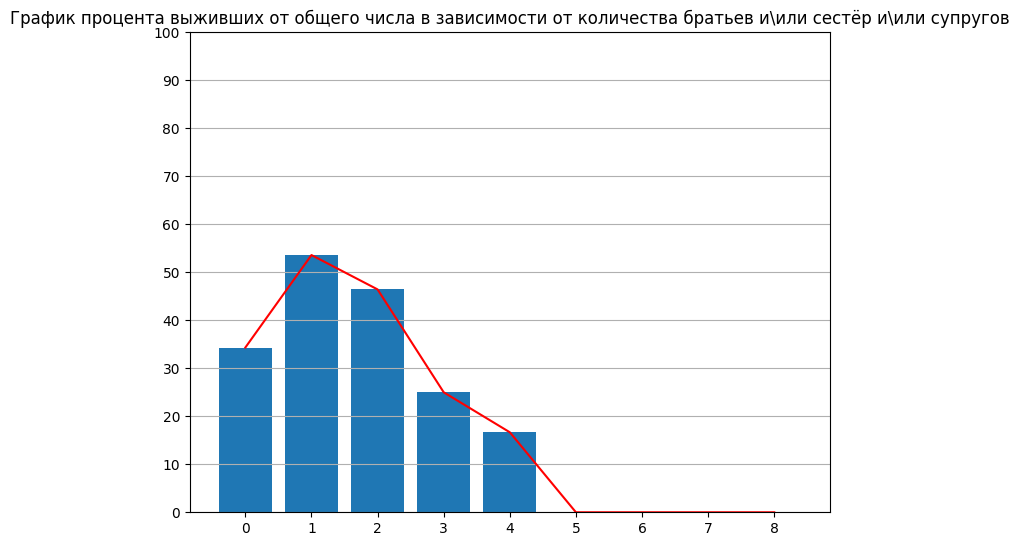

In [50]:
all_sibsps = sorted(titanic_full['SibSp'].unique().tolist())
heights = []
ax = plt.axes([0, 0, 1, 1])
for sibsp in all_sibsps:
    sum_of_sibsps = len(titanic_full.loc[titanic_full['SibSp']==sibsp])
    sum_of_survived_sibsps = len(titanic_full.loc[(titanic_full['SibSp']==sibsp) & (titanic_full['Survived']==1)])
    heights.append(sum_of_survived_sibsps*100/sum_of_sibsps)

ax.bar(all_sibsps, heights)
ax.plot(all_sibsps, heights, color='red')
ax.set_yticks([x for x in range(0, 101, 10)])
ax.set_xticks([x for x in range(0, 9, 1)])
ax.grid(axis='y')
ax.set_title('График процента выживших от общего числа в зависимости от количества братьев и\или сестёр и\или супругов')
plt.show()

0 606
1 209
2 28
3 16
4 18
5 5
8 7


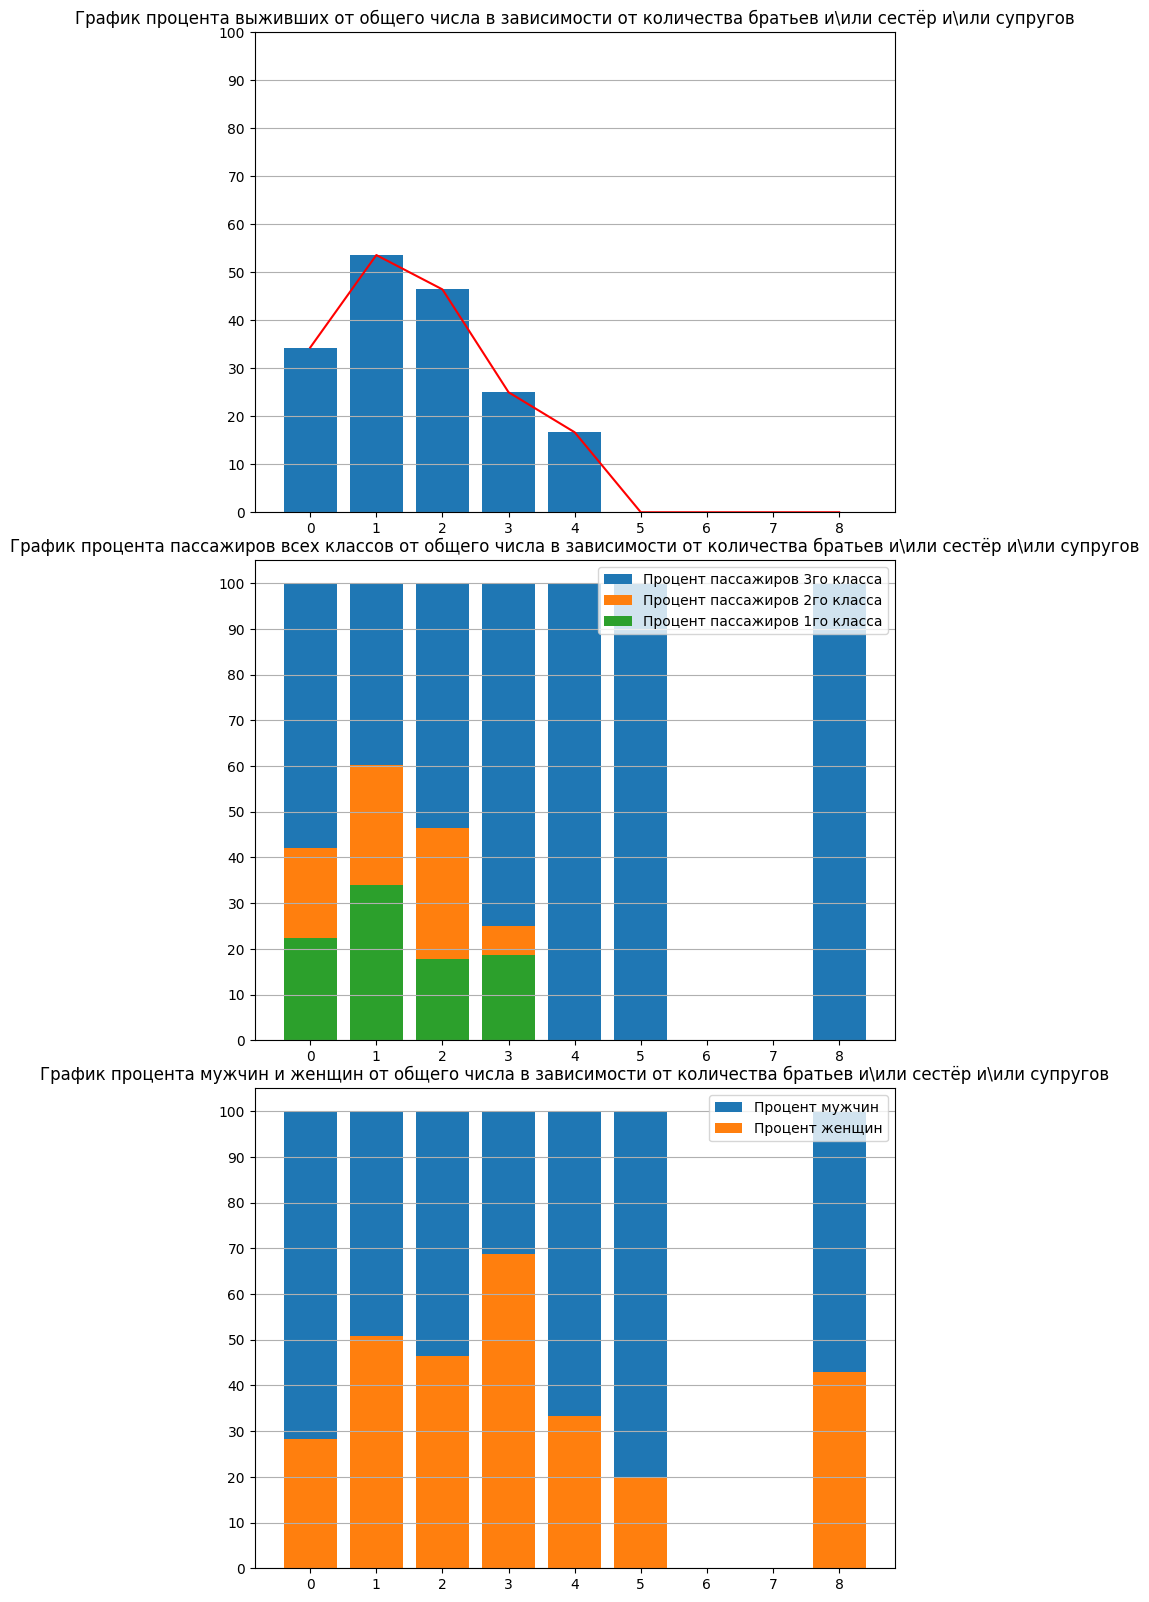

In [51]:
all_sibsps = sorted(titanic_full['SibSp'].unique().tolist())
heights1 = []
heights2 = []
ax1 = plt.axes([0, 0, 1, 1])
for sibsp in all_sibsps:
    sum_of_sibsps = len(titanic_full.loc[titanic_full['SibSp']==sibsp])
    sum_of_males_sibsps = len(titanic_full.loc[(titanic_full['SibSp']==sibsp) & (titanic_full['Sex']=='female')])
    heights1.append(sum_of_males_sibsps*100/sum_of_sibsps)
    heights2.append(100 - (sum_of_males_sibsps*100/sum_of_sibsps))

for i in range(len(all_sibsps)):
    heights2[i] = heights2[i] + heights1[i]

ax1.bar(all_sibsps, heights2, label='Процент мужчин')
ax1.bar(all_sibsps, heights1, label='Процент женщин')
ax1.set_yticks([x for x in range(0, 101, 10)])
ax1.set_xticks([x for x in range(0, 9, 1)])
ax1.grid(axis='y')
ax1.legend()
ax1.set_title('График процента мужчин и женщин от общего числа в зависимости от количества братьев и\или сестёр и\или супругов')

all_sibsps = sorted(titanic_full['SibSp'].unique().tolist())
heights1 = []
heights2 = []
heights3 = []
ax2 = plt.axes([0, 1.1, 1, 1])
for sibsp in all_sibsps:
    sum_of_sibsps = len(titanic_full.loc[titanic_full['SibSp']==sibsp])
    sum_of_1_sibsps = len(titanic_full.loc[(titanic_full['SibSp']==sibsp) & (titanic_full['Pclass']==1)])
    sum_of_2_sibsps = len(titanic_full.loc[(titanic_full['SibSp']==sibsp) & (titanic_full['Pclass']==2)])
    sum_of_3_sibsps = len(titanic_full.loc[(titanic_full['SibSp']==sibsp) & (titanic_full['Pclass']==3)])
    heights1.append(sum_of_1_sibsps*100/sum_of_sibsps)
    heights2.append(sum_of_2_sibsps*100/sum_of_sibsps)
    heights3.append(sum_of_3_sibsps*100/sum_of_sibsps)

for i in range(len(all_sibsps)):
    heights2[i] = heights2[i] + heights1[i]
    heights3[i] = heights2[i] + heights3[i]

ax2.bar(all_sibsps, heights3, label='Процент пассажиров 3го класса')
ax2.bar(all_sibsps, heights2, label='Процент пассажиров 2го класса')
ax2.bar(all_sibsps, heights1, label='Процент пассажиров 1го класса')
ax2.set_yticks([x for x in range(0, 101, 10)])
ax2.set_xticks([x for x in range(0, 9, 1)])
ax2.grid(axis='y')
ax2.legend()
ax2.set_title('График процента пассажиров всех классов от общего числа в зависимости от количества братьев и\или сестёр и\или супругов')

all_sibsps = sorted(titanic_full['SibSp'].unique().tolist())
heights = []
ax3 = plt.axes([0, 2.2, 1, 1])
for sibsp in all_sibsps:
    sum_of_sibsps = len(titanic_full.loc[titanic_full['SibSp']==sibsp])
    sum_of_survived_sibsps = len(titanic_full.loc[(titanic_full['SibSp']==sibsp) & (titanic_full['Survived']==1)])
    heights.append(sum_of_survived_sibsps*100/sum_of_sibsps)

ax3.bar(all_sibsps, heights)
ax3.plot(all_sibsps, heights, color='red')
ax3.set_yticks([x for x in range(0, 101, 10)])
ax3.set_xticks([x for x in range(0, 9, 1)])
ax3.grid(axis='y')
ax3.set_title('График процента выживших от общего числа в зависимости от количества братьев и\или сестёр и\или супругов')
for sibsp in all_sibsps:
    sum_of_sibsps = len(titanic_full.loc[titanic_full['SibSp']==sibsp])
    print(sibsp, sum_of_sibsps)
plt.show()

> ***ВЫВОД: Поле SibSp проверено, процент выжившего для каждого значения SibSp примерно равно сумме процентов пассажиров с классами 1 и 2, а зачения 5 и 8 крайне редко встречаются, поэтому ничего удивительного, что процент выживания там равен 0***

# **Feature Engineering**

Мы уже добавили один новый столбец к таблице, который обозночает социальную значимость титулов. Добавим ещё столбцы, которые будут показывать с приехали ли пассажира с семьей и совершеннолетние ли они

In [52]:
titanic_full = titanic_full.copy()
titanic_full['Adult'] = titanic_full.apply(lambda row: 1 if row['Age'] >= 18 else 0, axis=1)
titanic_full['Family_onboard'] = titanic_full.apply(lambda row: 0 if (row['SibSp'] == 0) and (row['Parch'] == 0) else 1, axis=1)
titanic_full

,Survived,Pclass,Name,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_v,Title_v,Embarked_v,Fare_rounded,Adult,Family_onboard
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Mr,male,22.000000,1,0,A/5 21171,7.2500,NaN,S,0,2,1,7,1,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,female,38.000000,1,0,PC 17599,71.2833,C85,C,1,9,1,71,1,1
3,1,3,"Heikkinen, Miss. Laina",Miss,female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,1,8,1,8,1,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,female,35.000000,1,0,113803,53.1000,C123,S,1,9,1,53,1,1
5,0,3,"Allen, Mr. William Henry",Mr,male,35.000000,0,0,373450,8.0500,NaN,S,0,2,1,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Rev,male,27.000000,0,0,211536,13.0000,NaN,S,0,1,1,13,1,0
888,1,1,"Graham, Miss. Margaret Edith",Miss,female,19.000000,0,0,112053,30.0000,B42,S,1,8,1,30,1,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,female,29.950256,1,2,W./C. 6607,23.4500,NaN,S,1,8,1,23,1,1


# ***Эксперименты с моделями машинного обучения/глубокого обучения (Начало)***

# **Векторизация (Доработка 2)**

Создадим отдельную таблицу, которую я буду использовать для машинного обучения, она будет включать в себя, все поля векторизованные мной, поле Title_v, которое является новым столбцом, основанным на столбце Title, объединёным по принципу социльной важности, а также поля, которые я не векторизовал (прим. Name, Cabin, Ticket) 

In [53]:
titanic_ml = titanic_full[['Survived', 'Pclass', 'Name', 'Title', 'Title_v',  'Sex_v', 'Age', 'Adult', 'SibSp', 'Parch', 'Family_onboard', 'Ticket', 'Fare', 'Cabin', 'Embarked_v']]
titanic_ml = titanic_ml.rename(columns={'Title_v': 'Value_of_Title', 'Sex_v': 'Sex', 'Embarked_v': 'Embarked'})
titanic_ml

,Survived,Pclass,Name,Title,Value_of_Title,Sex,Age,Adult,SibSp,Parch,Family_onboard,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",Mr,2,0,22.000000,1,1,0,1,A/5 21171,7.2500,NaN,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs,9,1,38.000000,1,1,0,1,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",Miss,8,1,26.000000,1,0,0,0,STON/O2. 3101282,7.9250,NaN,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs,9,1,35.000000,1,1,0,1,113803,53.1000,C123,1
5,0,3,"Allen, Mr. William Henry",Mr,2,0,35.000000,1,0,0,0,373450,8.0500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",Rev,1,0,27.000000,1,0,0,0,211536,13.0000,NaN,1
888,1,1,"Graham, Miss. Margaret Edith",Miss,8,1,19.000000,1,0,0,0,112053,30.0000,B42,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",Miss,8,1,29.950256,1,1,2,1,W./C. 6607,23.4500,NaN,1


Закодируем все текстовые значения в числовые с помощью LabelEncoder

In [54]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = titanic_ml.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    titanic_ml[col] = le.fit_transform(titanic_ml[col])
    label_encoders[col] = le

In [55]:
titanic_ml.isnull().sum()

Survived          0
Pclass            0
Name              0
Title             0
Value_of_Title    0
Sex               0
Age               0
Adult             0
SibSp             0
Parch             0
Family_onboard    0
Ticket            0
Fare              0
Cabin             0
Embarked          0
dtype: int64

Все столбцы векторизованы

# **Машинное обучение**

In [56]:
X = titanic_ml.drop(columns=['Survived'])
Y = titanic_ml['Survived']

> ***Линейная модель***

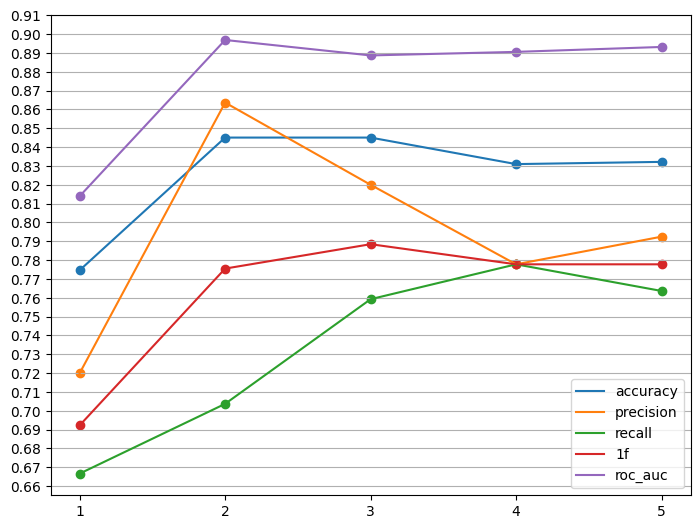

Кросс-валидация результаты:
Accuracy: [0.83216783 0.83098592 0.84507042 0.84507042 0.77464789]
Средняя Accuracy: 0.8256 (+/- 0.0524)
Precision: [0.79245283 0.77777778 0.82       0.86363636 0.72      ]
Средняя Precision: 0.7948 (+/- 0.0949)
Recall: [0.76363636 0.77777778 0.75925926 0.7037037  0.66666667]
Средняя Recall: 0.7342 (+/- 0.0843)
F1-score: [0.77777778 0.77777778 0.78846154 0.7755102  0.69230769]
Средняя F1-score: 0.7624 (+/- 0.0706)
ROC-AUC: [0.89318182 0.89057239 0.88867845 0.89688552 0.81397306]
Средняя ROC-AUC: 0.8767 (+/- 0.0629)


In [123]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, log_loss, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, make_scorer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

#Разделение на обучающую и тестовую выборки
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#Стандартизация данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Модель логистической регрессии
linear_model = LogisticRegression()
linear_model.fit(X_train, Y_train)

# Добавляем кросс-валидацию с 5 фолдами для всех метрик
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall', 
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

cv_results = cross_validate(linear_model, X_train, Y_train, cv=5, scoring=scoring)

# Выводим результаты кросс-валидации для всех метрик
ax1 = plt.axes([0, 0, 1, 1])
test_accuracy = list(cv_results['test_accuracy'])
test_accuracy.reverse()
ax1.plot([x for x in range(1, len(test_accuracy)+1)], test_accuracy, label='accuracy')
ax1.scatter([x for x in range(1, len(test_accuracy)+1)], test_accuracy)

test_precision = list(cv_results['test_precision'])
test_precision.reverse()
ax1.plot([x for x in range(1, len(test_precision)+1)], test_precision, label='precision')
ax1.scatter([x for x in range(1, len(test_precision)+1)], test_precision)

test_recall = list(cv_results['test_recall'])
test_recall.reverse()
ax1.plot([x for x in range(1, len(test_recall)+1)], test_recall, label='recall')
ax1.scatter([x for x in range(1, len(test_recall)+1)], test_recall)

test_f1 = list(cv_results['test_f1'])
test_f1.reverse()
ax1.plot([x for x in range(1, len(test_f1)+1)], test_f1, label='1f')
ax1.scatter([x for x in range(1, len(test_f1)+1)], test_f1)

test_roc_auc = list(cv_results['test_roc_auc'])
test_roc_auc.reverse()
ax1.plot([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc, label='roc_auc')
ax1.scatter([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc)

ax1.set_xticks([x for x in range(1, len(test_accuracy)+1)])
ax1.set_yticks([x/100 for x in range(66, 92, 1)])
ax1.grid(axis='y')
ax1.legend()

plt.show()

print("Кросс-валидация результаты:")
print(f"Accuracy: {cv_results['test_accuracy']}")
print(f"Средняя Accuracy: {cv_results['test_accuracy'].mean():.4f} (+/- {cv_results['test_accuracy'].std() * 2:.4f})")

print(f"Precision: {cv_results['test_precision']}")
print(f"Средняя Precision: {cv_results['test_precision'].mean():.4f} (+/- {cv_results['test_precision'].std() * 2:.4f})")

print(f"Recall: {cv_results['test_recall']}")
print(f"Средняя Recall: {cv_results['test_recall'].mean():.4f} (+/- {cv_results['test_recall'].std() * 2:.4f})")

print(f"F1-score: {cv_results['test_f1']}")
print(f"Средняя F1-score: {cv_results['test_f1'].mean():.4f} (+/- {cv_results['test_f1'].std() * 2:.4f})")

print(f"ROC-AUC: {cv_results['test_roc_auc']}")
print(f"Средняя ROC-AUC: {cv_results['test_roc_auc'].mean():.4f} (+/- {cv_results['test_roc_auc'].std() * 2:.4f})")

> ***Древесная модель***

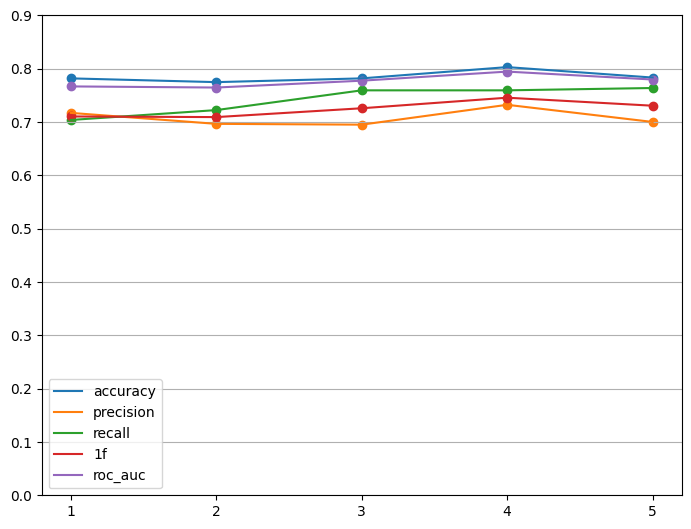

Глубина 1
Кросс-валидация результаты (5 фолдов):
Accuracy: [0.78321678 0.8028169  0.78169014 0.77464789 0.78169014]
Средняя Accuracy: 0.7848
Precision: [0.7        0.73214286 0.69491525 0.69642857 0.71698113]
Средняя Precision: 0.7081
Recall: [0.76363636 0.75925926 0.75925926 0.72222222 0.7037037 ]
Средняя Recall: 0.7416
F1-score: [0.73043478 0.74545455 0.72566372 0.70909091 0.71028037]
Средняя F1-score: 0.7242
ROC-AUC: [0.77954545 0.79440236 0.7773569  0.7645202  0.76662458]
Средняя ROC-AUC: 0.7765


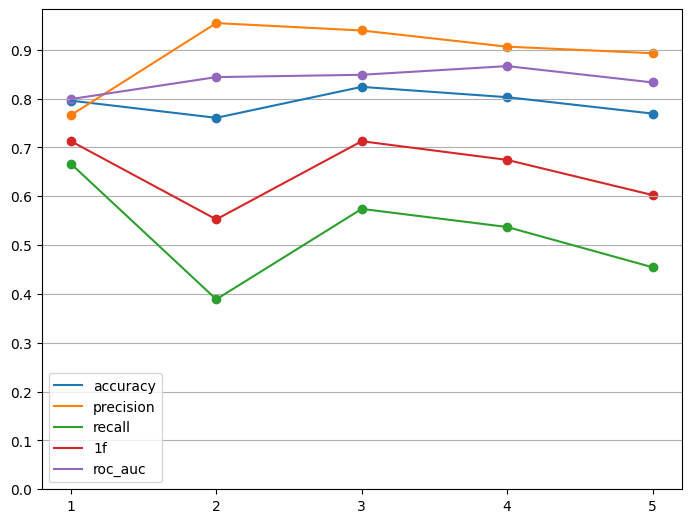

Глубина 2
Кросс-валидация результаты (5 фолдов):
Accuracy: [0.76923077 0.8028169  0.82394366 0.76056338 0.79577465]
Средняя Accuracy: 0.7905
Precision: [0.89285714 0.90625    0.93939394 0.95454545 0.76595745]
Средняя Precision: 0.8918
Recall: [0.45454545 0.53703704 0.57407407 0.38888889 0.66666667]
Средняя Recall: 0.5242
F1-score: [0.60240964 0.6744186  0.71264368 0.55263158 0.71287129]
Средняя F1-score: 0.6510
ROC-AUC: [0.83305785 0.86647727 0.84869529 0.84396044 0.79892677]
Средняя ROC-AUC: 0.8382


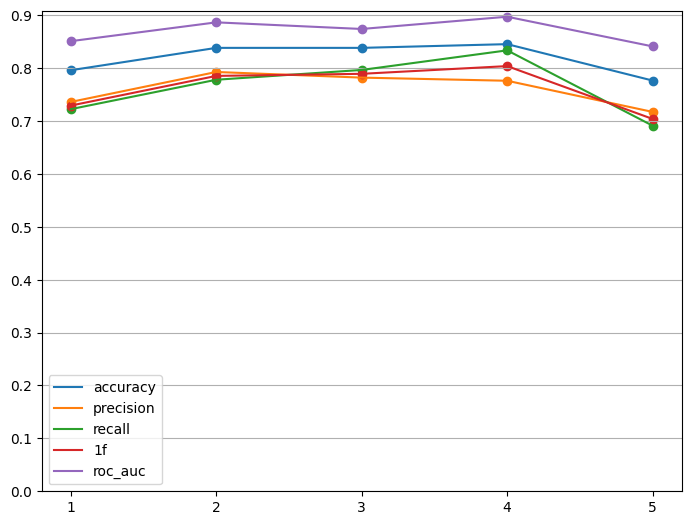

Глубина 3
Кросс-валидация результаты (5 фолдов):
Accuracy: [0.77622378 0.84507042 0.83802817 0.83802817 0.79577465]
Средняя Accuracy: 0.8186
Precision: [0.71698113 0.77586207 0.78181818 0.79245283 0.73584906]
Средняя Precision: 0.7606
Recall: [0.69090909 0.83333333 0.7962963  0.77777778 0.72222222]
Средняя Recall: 0.7641
F1-score: [0.7037037  0.80357143 0.78899083 0.78504673 0.72897196]
Средняя F1-score: 0.7621
ROC-AUC: [0.84080579 0.89688552 0.87373737 0.88625842 0.85069444]
Средняя ROC-AUC: 0.8697


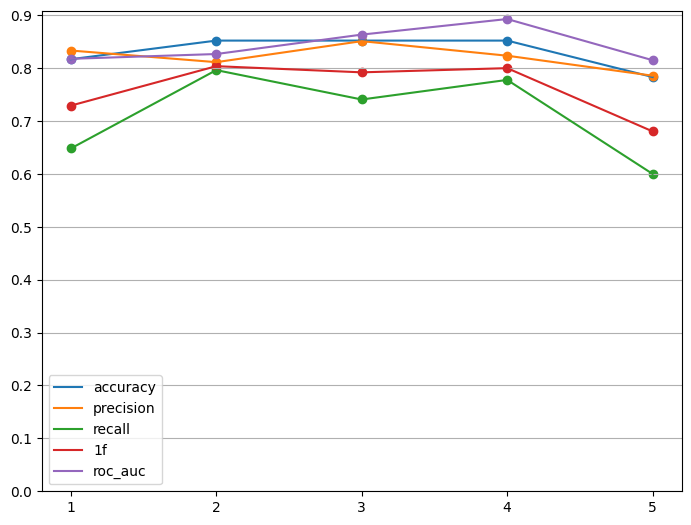

Глубина 4
Кросс-валидация результаты (5 фолдов):
Accuracy: [0.78321678 0.85211268 0.85211268 0.85211268 0.81690141]
Средняя Accuracy: 0.8313
Precision: [0.78571429 0.82352941 0.85106383 0.81132075 0.83333333]
Средняя Precision: 0.8210
Recall: [0.6        0.77777778 0.74074074 0.7962963  0.64814815]
Средняя Recall: 0.7126
F1-score: [0.68041237 0.8        0.79207921 0.80373832 0.72916667]
Средняя F1-score: 0.7611
ROC-AUC: [0.81497934 0.89288721 0.86342593 0.82670455 0.81765572]
Средняя ROC-AUC: 0.8431


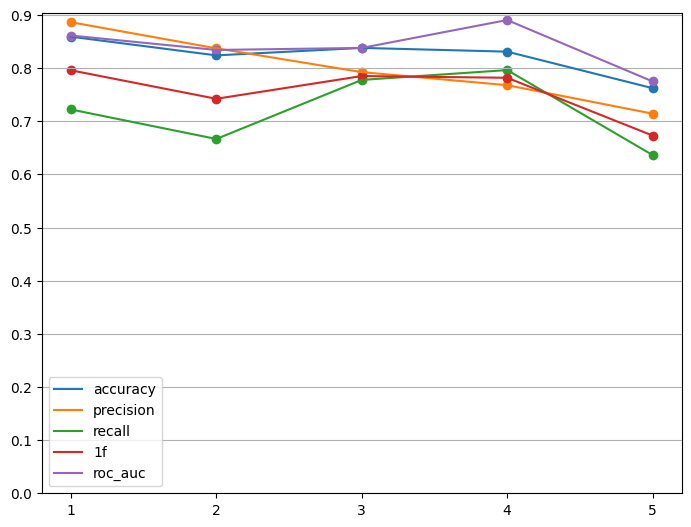

Глубина 5
Кросс-валидация результаты (5 фолдов):
Accuracy: [0.76223776 0.83098592 0.83802817 0.82394366 0.85915493]
Средняя Accuracy: 0.8229
Precision: [0.71428571 0.76785714 0.79245283 0.8372093  0.88636364]
Средняя Precision: 0.7996
Recall: [0.63636364 0.7962963  0.77777778 0.66666667 0.72222222]
Средняя Recall: 0.7199
F1-score: [0.67307692 0.78181818 0.78504673 0.74226804 0.79591837]
Средняя F1-score: 0.7556
ROC-AUC: [0.77489669 0.89046717 0.83796296 0.83417508 0.86132155]
Средняя ROC-AUC: 0.8398


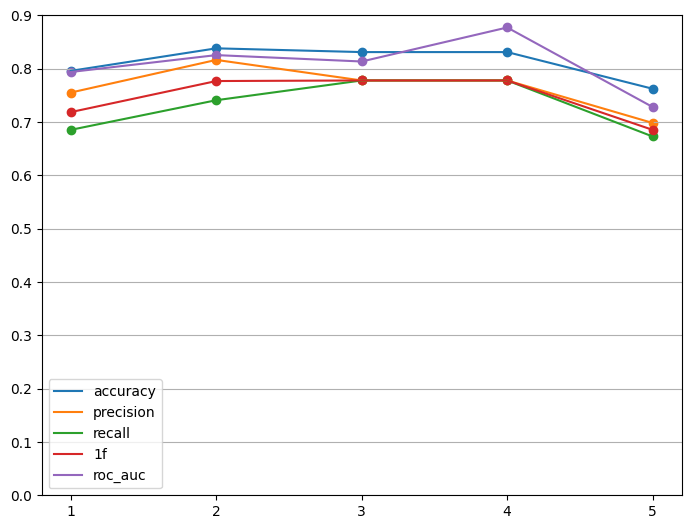

Глубина 6
Кросс-валидация результаты (5 фолдов):
Accuracy: [0.76223776 0.83098592 0.83098592 0.83802817 0.79577465]
Средняя Accuracy: 0.8116
Precision: [0.69811321 0.77777778 0.77777778 0.81632653 0.75510204]
Средняя Precision: 0.7650
Recall: [0.67272727 0.77777778 0.77777778 0.74074074 0.68518519]
Средняя Recall: 0.7308
F1-score: [0.68518519 0.77777778 0.77777778 0.77669903 0.7184466 ]
Средняя F1-score: 0.7472
ROC-AUC: [0.72799587 0.87710438 0.81334175 0.8253367  0.79366582]
Средняя ROC-AUC: 0.8075


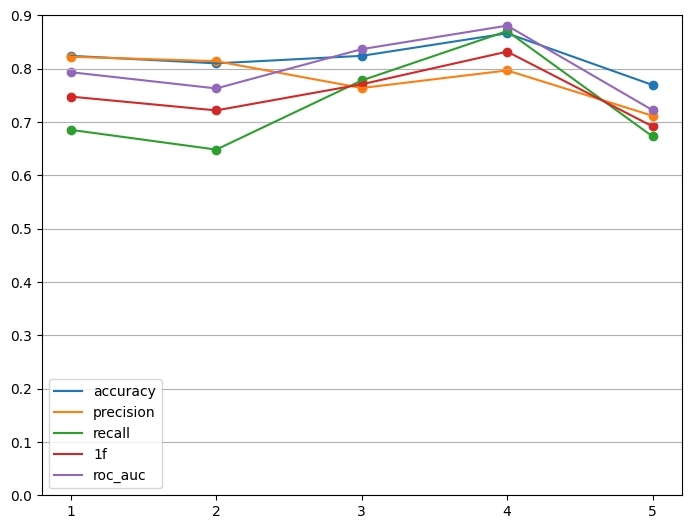

Глубина 7
Кросс-валидация результаты (5 фолдов):
Accuracy: [0.76923077 0.86619718 0.82394366 0.80985915 0.82394366]
Средняя Accuracy: 0.8186
Precision: [0.71153846 0.79661017 0.76363636 0.81395349 0.82222222]
Средняя Precision: 0.7816
Recall: [0.67272727 0.87037037 0.77777778 0.64814815 0.68518519]
Средняя Recall: 0.7308
F1-score: [0.69158879 0.83185841 0.7706422  0.72164948 0.74747475]
Средняя F1-score: 0.7526
ROC-AUC: [0.72200413 0.8805766  0.8364899  0.7628367  0.79324495]
Средняя ROC-AUC: 0.7990


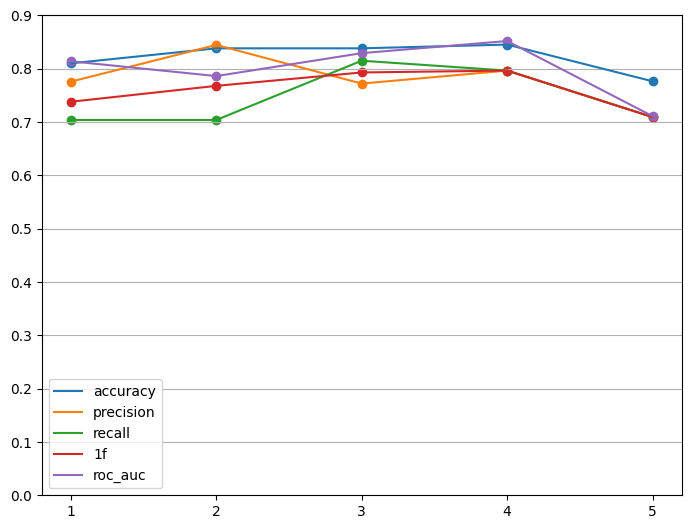

Глубина 8
Кросс-валидация результаты (5 фолдов):
Accuracy: [0.77622378 0.84507042 0.83802817 0.83802817 0.80985915]
Средняя Accuracy: 0.8214
Precision: [0.70909091 0.7962963  0.77192982 0.84444444 0.7755102 ]
Средняя Precision: 0.7795
Recall: [0.70909091 0.7962963  0.81481481 0.7037037  0.7037037 ]
Средняя Recall: 0.7455
F1-score: [0.70909091 0.7962963  0.79279279 0.76767677 0.73786408]
Средняя F1-score: 0.7607
ROC-AUC: [0.7107438  0.85174663 0.82901936 0.78598485 0.81376263]
Средняя ROC-AUC: 0.7983


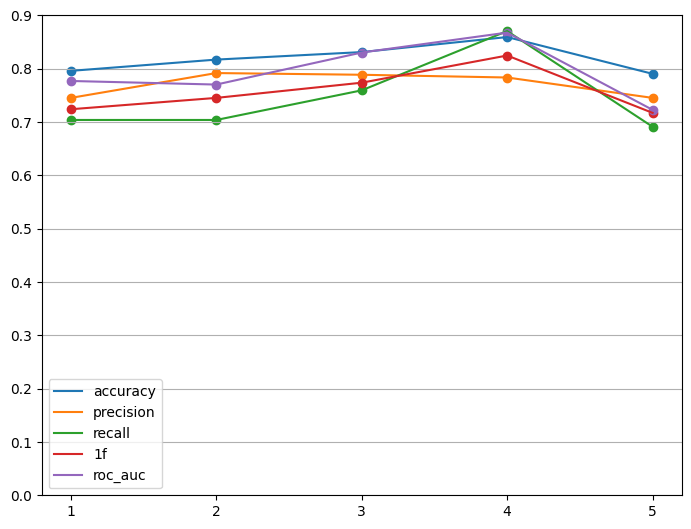

Глубина 9
Кросс-валидация результаты (5 фолдов):
Accuracy: [0.79020979 0.85915493 0.83098592 0.81690141 0.79577465]
Средняя Accuracy: 0.8186
Precision: [0.74509804 0.78333333 0.78846154 0.79166667 0.74509804]
Средняя Precision: 0.7707
Recall: [0.69090909 0.87037037 0.75925926 0.7037037  0.7037037 ]
Средняя Recall: 0.7456
F1-score: [0.71698113 0.8245614  0.77358491 0.74509804 0.72380952]
Средняя F1-score: 0.7568
ROC-AUC: [0.72262397 0.86752946 0.83017677 0.7700968  0.77683081]
Средняя ROC-AUC: 0.7935


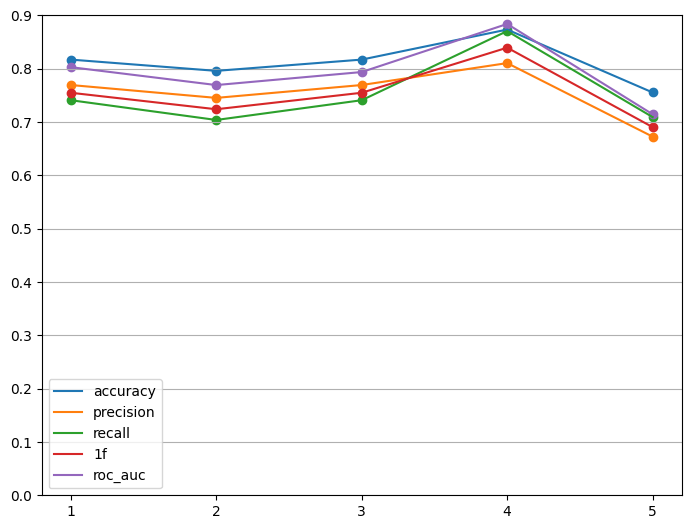

Глубина 10
Кросс-валидация результаты (5 фолдов):
Accuracy: [0.75524476 0.87323944 0.81690141 0.79577465 0.81690141]
Средняя Accuracy: 0.8116
Precision: [0.67241379 0.81034483 0.76923077 0.74509804 0.76923077]
Средняя Precision: 0.7533
Recall: [0.70909091 0.87037037 0.74074074 0.7037037  0.74074074]
Средняя Recall: 0.7529
F1-score: [0.69026549 0.83928571 0.75471698 0.72380952 0.75471698]
Средняя F1-score: 0.7526
ROC-AUC: [0.7143595  0.88373316 0.79356061 0.76914983 0.80271465]
Средняя ROC-AUC: 0.7927
[[1, 0.7358559859161201], [2, 0.7480393632335963], [9, 0.7490433445394092], [6, 0.7496348601492817], [3, 0.7667024667549173], [8, 0.7681399533294886], [4, 0.7690410561009153], [7, 0.774414153269787], [10, 0.7768609092037873], [5, 0.8249961408663621]]


In [140]:
# Добавляем кросс-валидацию с 5 фолдами
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall', 
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

metrics = []
depths = range(1, 11)
for depth in depths:
    current_tree = DecisionTreeClassifier(max_depth=depth)

    cv_results = cross_validate(current_tree, X_train, Y_train, cv=5, scoring=scoring)

    # Выводим результаты кросс-валидации для всех метрик
    ax1 = plt.axes([0, 0, 1, 1])
    test_accuracy = list(cv_results['test_accuracy'])
    test_accuracy.reverse()
    ax1.plot([x for x in range(1, len(test_accuracy)+1)], test_accuracy, label='accuracy')
    ax1.scatter([x for x in range(1, len(test_accuracy)+1)], test_accuracy)

    test_precision = list(cv_results['test_precision'])
    test_precision.reverse()
    ax1.plot([x for x in range(1, len(test_precision)+1)], test_precision, label='precision')
    ax1.scatter([x for x in range(1, len(test_precision)+1)], test_precision)

    test_recall = list(cv_results['test_recall'])
    test_recall.reverse()
    ax1.plot([x for x in range(1, len(test_recall)+1)], test_recall, label='recall')
    ax1.scatter([x for x in range(1, len(test_recall)+1)], test_recall)

    test_f1 = list(cv_results['test_f1'])
    test_f1.reverse()
    ax1.plot([x for x in range(1, len(test_f1)+1)], test_f1, label='1f')
    ax1.scatter([x for x in range(1, len(test_f1)+1)], test_f1)

    test_roc_auc = list(cv_results['test_roc_auc'])
    test_roc_auc.reverse()
    ax1.plot([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc, label='roc_auc')
    ax1.scatter([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc)

    ax1.set_xticks([x for x in range(1, len(test_accuracy)+1)])
    ax1.set_yticks([x/100 for x in range(0, 100, 10)])
    ax1.grid(axis='y')
    ax1.legend()
    ph = [depth, sum([test_accuracy[0], test_precision[0], test_recall[0], test_f1[0], test_roc_auc[0]]) / 5]
    metrics.append(ph)
    plt.show()
    print(f'Глубина {depth}')
    # Выводим результаты кросс-валидации
    print("Кросс-валидация результаты (5 фолдов):")
    print(f"Accuracy: {cv_results['test_accuracy']}")
    print(f"Средняя Accuracy: {cv_results['test_accuracy'].mean():.4f}")

    print(f"Precision: {cv_results['test_precision']}")
    print(f"Средняя Precision: {cv_results['test_precision'].mean():.4f}")
    
    print(f"Recall: {cv_results['test_recall']}")
    print(f"Средняя Recall: {cv_results['test_recall'].mean():.4f}")

    print(f"F1-score: {cv_results['test_f1']}")
    print(f"Средняя F1-score: {cv_results['test_f1'].mean():.4f}")

    print(f"ROC-AUC: {cv_results['test_roc_auc']}")
    print(f"Средняя ROC-AUC: {cv_results['test_roc_auc'].mean():.4f}")

print(sorted(metrics, key=lambda x: x[1]))

Наибольшее среднее значение всех метрик имеет модель с глубиной 5. Выведем её кросс-валидацию

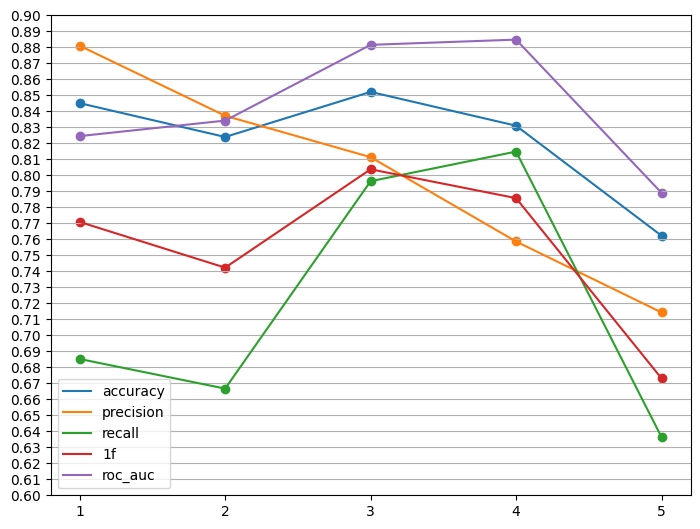

Глубина 5
Кросс-валидация результаты (5 фолдов):
Accuracy: [0.76223776 0.83098592 0.85211268 0.82394366 0.84507042]
Средняя Accuracy: 0.8229
Precision: [0.71428571 0.75862069 0.81132075 0.8372093  0.88095238]
Средняя Precision: 0.8005
Recall: [0.63636364 0.81481481 0.7962963  0.66666667 0.68518519]
Средняя Recall: 0.7199
F1-score: [0.67307692 0.78571429 0.80373832 0.74226804 0.77083333]
Средняя F1-score: 0.7551
ROC-AUC: [0.78904959 0.88478535 0.88152357 0.83417508 0.82449495]
Средняя ROC-AUC: 0.8428


In [139]:
# Добавляем кросс-валидацию с 5 фолдами
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall', 
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

metrics = []
depth = 5

current_tree = DecisionTreeClassifier(max_depth=depth)
current_tree.fit(X_train, Y_train)

cv_results = cross_validate(current_tree, X_train, Y_train, cv=5, scoring=scoring)

# Выводим результаты кросс-валидации для всех метрик
ax1 = plt.axes([0, 0, 1, 1])
test_accuracy = list(cv_results['test_accuracy'])
test_accuracy.reverse()
ax1.plot([x for x in range(1, len(test_accuracy)+1)], test_accuracy, label='accuracy')
ax1.scatter([x for x in range(1, len(test_accuracy)+1)], test_accuracy)

test_precision = list(cv_results['test_precision'])
test_precision.reverse()
ax1.plot([x for x in range(1, len(test_precision)+1)], test_precision, label='precision')
ax1.scatter([x for x in range(1, len(test_precision)+1)], test_precision)

test_recall = list(cv_results['test_recall'])
test_recall.reverse()
ax1.plot([x for x in range(1, len(test_recall)+1)], test_recall, label='recall')
ax1.scatter([x for x in range(1, len(test_recall)+1)], test_recall)

test_f1 = list(cv_results['test_f1'])
test_f1.reverse()
ax1.plot([x for x in range(1, len(test_f1)+1)], test_f1, label='1f')
ax1.scatter([x for x in range(1, len(test_f1)+1)], test_f1)

test_roc_auc = list(cv_results['test_roc_auc'])
test_roc_auc.reverse()
ax1.plot([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc, label='roc_auc')
ax1.scatter([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc)

ax1.set_xticks([x for x in range(1, len(test_accuracy)+1)])
ax1.set_yticks([x/100 for x in range(60, 91, 1)])
ax1.grid(axis='y')
ax1.legend()

plt.show()
print(f'Глубина {depth}')
# Выводим результаты кросс-валидации
print("Кросс-валидация результаты (5 фолдов):")
print(f"Accuracy: {cv_results['test_accuracy']}")
print(f"Средняя Accuracy: {cv_results['test_accuracy'].mean():.4f}")

print(f"Precision: {cv_results['test_precision']}")
print(f"Средняя Precision: {cv_results['test_precision'].mean():.4f}")
    
print(f"Recall: {cv_results['test_recall']}")
print(f"Средняя Recall: {cv_results['test_recall'].mean():.4f}")

print(f"F1-score: {cv_results['test_f1']}")
print(f"Средняя F1-score: {cv_results['test_f1'].mean():.4f}")

print(f"ROC-AUC: {cv_results['test_roc_auc']}")
print(f"Средняя ROC-AUC: {cv_results['test_roc_auc'].mean():.4f}")

> ***Модель градиентного бустинга***

Перебём все гиперпараметры, сохраним их и выберем лучший набор по среднему значению всех метрик


Лучшие комбинации гиперпараметров:
1. n_estimators: 50, max_depth: 5, learning_rate: 0.14, score: 0.8273
2. n_estimators: 60, max_depth: 4, learning_rate: 0.11, score: 0.8254
3. n_estimators: 60, max_depth: 5, learning_rate: 0.13, score: 0.8253
4. n_estimators: 60, max_depth: 4, learning_rate: 0.14, score: 0.8250
5. n_estimators: 60, max_depth: 5, learning_rate: 0.14, score: 0.8250

Лучшие параметры: n_estimators=50, max_depth=5, learning_rate=0.14


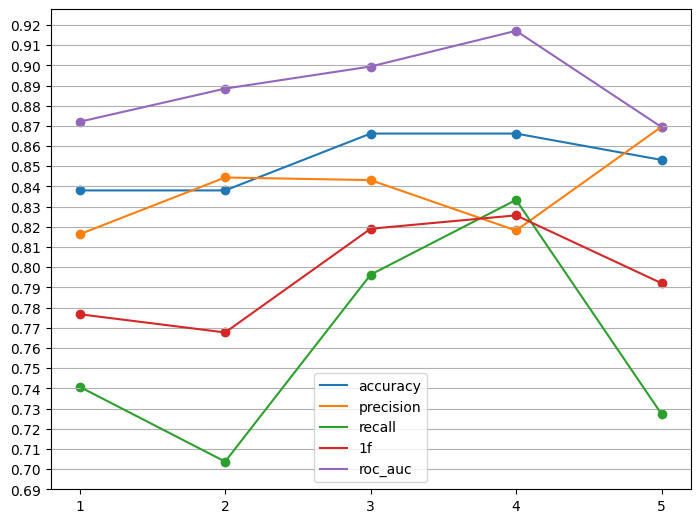

In [147]:
# Добавляем кросс-валидацию с 5 фолдами для подбора гиперпараметров XGBoost
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall', 
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

metrics = []
n_estimators_list = range(50, 70, 10)
max_depth_list = range(1, 6)
learning_rate_list = [x/100 for x in range(7, 15)]

for n_estimators in n_estimators_list:
    for max_depth in max_depth_list:
        for learning_rate in learning_rate_list:
            grad_model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, eval_metric='logloss')

            cv_results = cross_validate(grad_model, X_train, Y_train, cv=5, scoring=scoring)
            
            # Сохраняем среднее значение всех метрик
            mean_score = (cv_results['test_accuracy'].mean() + 
                         cv_results['test_precision'].mean() + 
                         cv_results['test_recall'].mean() + 
                         cv_results['test_f1'].mean() + 
                         cv_results['test_roc_auc'].mean()) / 5
            
            ph = [n_estimators, max_depth, learning_rate, mean_score]
            metrics.append(ph)
            
# Сортируем метрики по качеству и выводим лучшие комбинации
sorted_metrics = sorted(metrics, key=lambda x: x[3], reverse=True)
print("\nЛучшие комбинации гиперпараметров:")
for i, metric in enumerate(sorted_metrics[:5]):
    print(f"{i+1}. n_estimators: {metric[0]}, max_depth: {metric[1]}, learning_rate: {metric[2]}, score: {metric[3]:.4f}")

# Обучаем финальную модель с лучшими параметрами
best_params = sorted_metrics[0]
best_n_estimators = best_params[0]
best_max_depth = best_params[1]
best_learning_rate = best_params[2]

print(f"\nЛучшие параметры: n_estimators={best_n_estimators}, max_depth={best_max_depth}, learning_rate={best_learning_rate}")

#Модель градиентного бустинга (XGBoost) с лучшими параметрами
grad_model = XGBClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, learning_rate=best_learning_rate, eval_metric='logloss')
grad_model.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_test, Y_test)], verbose=False)


cv_results = cross_validate(grad_model, X_train, Y_train, cv=5, scoring=scoring)
# Визуализация результатов кросс-валидации для всех метрик
ax1 = plt.axes([0, 0, 1, 1])
test_accuracy = list(cv_results['test_accuracy'])
test_accuracy.reverse()
ax1.plot([x for x in range(1, len(test_accuracy)+1)], test_accuracy, label='accuracy')
ax1.scatter([x for x in range(1, len(test_accuracy)+1)], test_accuracy)

test_precision = list(cv_results['test_precision'])
test_precision.reverse()
ax1.plot([x for x in range(1, len(test_precision)+1)], test_precision, label='precision')
ax1.scatter([x for x in range(1, len(test_precision)+1)], test_precision)

test_recall = list(cv_results['test_recall'])
test_recall.reverse()
ax1.plot([x for x in range(1, len(test_recall)+1)], test_recall, label='recall')
ax1.scatter([x for x in range(1, len(test_recall)+1)], test_recall)

test_f1 = list(cv_results['test_f1'])
test_f1.reverse()
ax1.plot([x for x in range(1, len(test_f1)+1)], test_f1, label='1f')
ax1.scatter([x for x in range(1, len(test_f1)+1)], test_f1)

test_roc_auc = list(cv_results['test_roc_auc'])
test_roc_auc.reverse()
ax1.plot([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc, label='roc_auc')
ax1.scatter([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc)

ax1.set_xticks([x for x in range(1, len(test_accuracy)+1)])
ax1.set_yticks([x/100 for x in range(69, 93, 1)])
ax1.grid(axis='y')
ax1.legend()
plt.show()

> ***Нейросетевая модель***

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptro


Лучшие комбинации гиперпараметров:
1. hidden_layer_sizes: (100, 50), activation: tanh, learning_rate: constant, score: 0.8133
2. hidden_layer_sizes: (100, 50), activation: tanh, learning_rate: adaptive, score: 0.8133
3. hidden_layer_sizes: (100, 100), activation: relu, learning_rate: constant, score: 0.8072
4. hidden_layer_sizes: (100, 100), activation: relu, learning_rate: adaptive, score: 0.8072
5. hidden_layer_sizes: (50, 50), activation: relu, learning_rate: constant, score: 0.8057

Лучшие параметры: hidden_layer_sizes=(100, 50), activation=tanh, learning_rate=constant


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perce

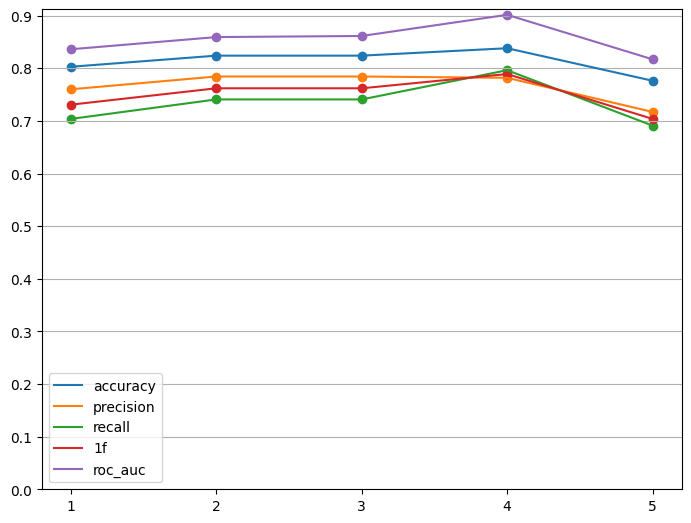

In [150]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate

# Добавляем кросс-валидацию с 5 фолдами для подбора гиперпараметров нейросети
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall', 
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

metrics = []
hidden_layer_sizes_list = [(50,), (100,), (50, 50), (100, 50), (100, 100)]  # Архитектуры сети
activation_list = ['relu', 'tanh']  # Функции активации
learning_rate_list = ['constant', 'adaptive']  # Стратегии обучения

for hidden_layer_sizes in hidden_layer_sizes_list:
    for activation in activation_list:
        for learning_rate in learning_rate_list:
            nn_model = MLPClassifier(
                hidden_layer_sizes=hidden_layer_sizes,
                activation=activation,
                learning_rate=learning_rate,
                max_iter=100,
                random_state=42
            )

            cv_results = cross_validate(nn_model, X_train, Y_train, cv=5, scoring=scoring)
            
            # Сохраняем среднее значение всех метрик
            mean_score = (cv_results['test_accuracy'].mean() + 
                         cv_results['test_precision'].mean() + 
                         cv_results['test_recall'].mean() + 
                         cv_results['test_f1'].mean() + 
                         cv_results['test_roc_auc'].mean()) / 5
            
            ph = [hidden_layer_sizes, activation, learning_rate, mean_score]
            metrics.append(ph)
            

# Сортируем метрики по качеству и выводим лучшие комбинации
sorted_metrics = sorted(metrics, key=lambda x: x[3], reverse=True)
print("\nЛучшие комбинации гиперпараметров:")
for i, metric in enumerate(sorted_metrics[:5]):
    print(f"{i+1}. hidden_layer_sizes: {metric[0]}, activation: {metric[1]}, learning_rate: {metric[2]}, score: {metric[3]:.4f}")

# Обучаем финальную модель с лучшими параметрами
best_params = sorted_metrics[0]
best_hidden_layer_sizes = best_params[0]
best_activation = best_params[1]
best_learning_rate = best_params[2]

print(f"\nЛучшие параметры: hidden_layer_sizes={best_hidden_layer_sizes}, activation={best_activation}, learning_rate={best_learning_rate}")

# Модель нейронной сети с лучшими параметрами
nn_model = MLPClassifier(
    hidden_layer_sizes=best_hidden_layer_sizes,
    activation=best_activation,
    learning_rate=best_learning_rate,
    max_iter=1000,
    random_state=42
)

cv_results = cross_validate(nn_model, X_train, Y_train, cv=5, scoring=scoring)

# Визуализация результатов кросс-валидации для всех метрик
ax1 = plt.axes([0, 0, 1, 1])
test_accuracy = list(cv_results['test_accuracy'])
test_accuracy.reverse()
ax1.plot([x for x in range(1, len(test_accuracy)+1)], test_accuracy, label='accuracy')
ax1.scatter([x for x in range(1, len(test_accuracy)+1)], test_accuracy)

test_precision = list(cv_results['test_precision'])
test_precision.reverse()
ax1.plot([x for x in range(1, len(test_precision)+1)], test_precision, label='precision')
ax1.scatter([x for x in range(1, len(test_precision)+1)], test_precision)

test_recall = list(cv_results['test_recall'])
test_recall.reverse()
ax1.plot([x for x in range(1, len(test_recall)+1)], test_recall, label='recall')
ax1.scatter([x for x in range(1, len(test_recall)+1)], test_recall)

test_f1 = list(cv_results['test_f1'])
test_f1.reverse()
ax1.plot([x for x in range(1, len(test_f1)+1)], test_f1, label='1f')
ax1.scatter([x for x in range(1, len(test_f1)+1)], test_f1)

test_roc_auc = list(cv_results['test_roc_auc'])
test_roc_auc.reverse()
ax1.plot([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc, label='roc_auc')
ax1.scatter([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc)

ax1.set_xticks([x for x in range(1, len(test_accuracy)+1)])
ax1.set_yticks([x/100 for x in range(0, 100, 10)])
ax1.grid(axis='y')
ax1.legend()

# Сохраняем среднее значение всех метрик
mean_score = (cv_results['test_accuracy'].mean() + 
             cv_results['test_precision'].mean() + 
             cv_results['test_recall'].mean() + 
             cv_results['test_f1'].mean() + 
             cv_results['test_roc_auc'].mean()) / 5

ph = [hidden_layer_sizes, activation, learning_rate, mean_score]
metrics.append(ph)
plt.show()

По итогам проверки выяснилось, что лучшая модель это модель градиентого бустинга, среднее значение метрик - 0.8273.
Подберём для неё лучшие параментры с помощью optuna

[I 2025-11-25 17:31:14,165] A new study created in memory with name: xgboost_hyperparameter_optimization


Начинаем оптимизацию гиперпараметров с Optuna...


  0%|          | 0/100 [00:00<?, ?it/s]

[I 2025-11-25 17:31:14,788] Trial 0 finished with value: 0.7541295671543167 and parameters: {'n_estimators': 253, 'max_depth': 8, 'learning_rate': 0.011045860864144637, 'subsample': 0.9317125499577338, 'colsample_bytree': 0.7316975197442201, 'reg_alpha': 0.13231864290704948, 'reg_lambda': 9.17682315843615e-05, 'min_child_weight': 10, 'gamma': 0.1898765975084471}. Best is trial 0 with value: 0.7541295671543167.
[I 2025-11-25 17:31:15,047] Trial 1 finished with value: 0.722923375505873 and parameters: {'n_estimators': 114, 'max_depth': 6, 'learning_rate': 0.028751156234824878, 'subsample': 0.6785769514935888, 'colsample_bytree': 0.8595142157017568, 'reg_alpha': 0.8429089550617329, 'reg_lambda': 0.0019576481071623152, 'min_child_weight': 10, 'gamma': 2.752496641695299}. Best is trial 0 with value: 0.7541295671543167.
[I 2025-11-25 17:31:15,297] Trial 2 finished with value: 0.767846766003033 and parameters: {'n_estimators': 144, 'max_depth': 5, 'learning_rate': 0.2023678723044643, 'subsamp

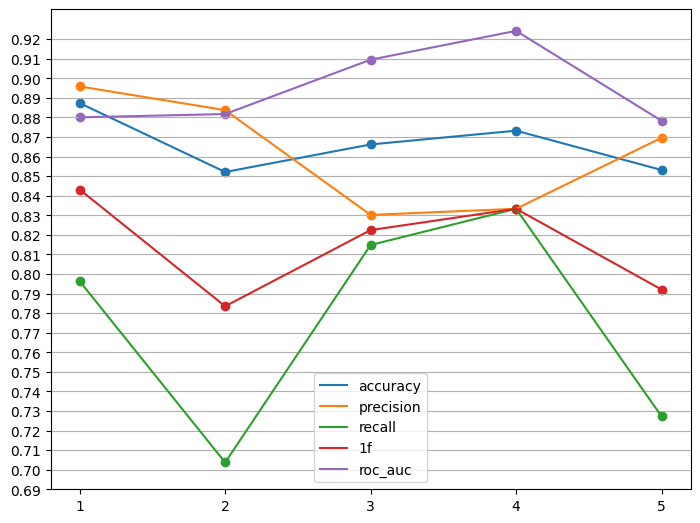

Кросс-валидация результаты (5 фолдов):
Accuracy: [0.85314685 0.87323944 0.86619718 0.85211268 0.88732394]
Средняя Accuracy: 0.8664
Precision: [0.86956522 0.83333333 0.83018868 0.88372093 0.89583333]
Средняя Precision: 0.8625
Recall: [0.72727273 0.83333333 0.81481481 0.7037037  0.7962963 ]
Средняя Recall: 0.7751
F1-score: [0.79207921 0.83333333 0.82242991 0.78350515 0.84313725]
Средняя F1-score: 0.8149
ROC-AUC: [0.87830579 0.92424242 0.90951178 0.88173401 0.88005051]
Средняя ROC-AUC: 0.8948


In [156]:
import optuna

# Определяем метрики для оценки
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall', 
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}

def objective(trial):

    # Предлагаем значения гиперпараметров
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-8, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-8, 10.0, log=True),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.0, 5.0),
        'eval_metric': 'logloss',
        'random_state': 42
    }
    
    # Создаем модель
    model = XGBClassifier(**param)
    
    # Кросс-валидация с 5 фолдами
    cv_results = cross_validate(model, X_train, Y_train, cv=5, scoring=scoring)
    
    # Вычисляем средний F1-score как основную метрику для оптимизации
    mean_f1 = cv_results['test_f1'].mean()
    
    # Сохраняем все метрики для отображения
    trial.set_user_attr('accuracy', cv_results['test_accuracy'].mean())
    trial.set_user_attr('precision', cv_results['test_precision'].mean())
    trial.set_user_attr('recall', cv_results['test_recall'].mean())
    trial.set_user_attr('roc_auc', cv_results['test_roc_auc'].mean())
    
    return mean_f1

# Создаем исследование
study = optuna.create_study(
    direction='maximize',
    study_name='xgboost_hyperparameter_optimization'
)

# Запускаем оптимизацию
print("Начинаем оптимизацию гиперпараметров с Optuna...")
study.optimize(objective, n_trials=100, show_progress_bar=True)

# Выводим результаты
print("Лучшие параметры:")
best_params = study.best_params
for param, value in best_params.items():
    print(f"{param}: {value}")

print(f"\nЛучший F1-score: {study.best_value:.4f}")

# Выводим все метрики для лучшего trial
best_trial = study.best_trial
print(f"\nВсе метрики для лучшей модели:")
print(f"Accuracy: {best_trial.user_attrs['accuracy']:.4f}")
print(f"Precision: {best_trial.user_attrs['precision']:.4f}")
print(f"Recall: {best_trial.user_attrs['recall']:.4f}")
print(f"F1-score: {study.best_value:.4f}")
print(f"ROC-AUC: {best_trial.user_attrs['roc_auc']:.4f}")

# Обучаем финальную модель с лучшими параметрами
print("Обучение финальной модели:")

best_grad_model = XGBClassifier(**best_params, eval_metric='logloss', random_state=42)
best_grad_model.fit(
    X_train, Y_train,
    eval_set=[(X_train, Y_train), (X_test, Y_test)],
    verbose=False
)

cv_results = cross_validate(best_grad_model, X_train, Y_train, cv=5, scoring=scoring)
# Визуализация результатов кросс-валидации для всех метрик
ax1 = plt.axes([0, 0, 1, 1])
test_accuracy = list(cv_results['test_accuracy'])
test_accuracy.reverse()
ax1.plot([x for x in range(1, len(test_accuracy)+1)], test_accuracy, label='accuracy')
ax1.scatter([x for x in range(1, len(test_accuracy)+1)], test_accuracy)

test_precision = list(cv_results['test_precision'])
test_precision.reverse()
ax1.plot([x for x in range(1, len(test_precision)+1)], test_precision, label='precision')
ax1.scatter([x for x in range(1, len(test_precision)+1)], test_precision)

test_recall = list(cv_results['test_recall'])
test_recall.reverse()
ax1.plot([x for x in range(1, len(test_recall)+1)], test_recall, label='recall')
ax1.scatter([x for x in range(1, len(test_recall)+1)], test_recall)

test_f1 = list(cv_results['test_f1'])
test_f1.reverse()
ax1.plot([x for x in range(1, len(test_f1)+1)], test_f1, label='1f')
ax1.scatter([x for x in range(1, len(test_f1)+1)], test_f1)

test_roc_auc = list(cv_results['test_roc_auc'])
test_roc_auc.reverse()
ax1.plot([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc, label='roc_auc')
ax1.scatter([x for x in range(1, len(test_roc_auc)+1)], test_roc_auc)

ax1.set_xticks([x for x in range(1, len(test_accuracy)+1)])
ax1.set_yticks([x/100 for x in range(69, 93, 1)])
ax1.grid(axis='y')
ax1.legend()
plt.show()
print("Кросс-валидация результаты (5 фолдов):")
print(f"Accuracy: {cv_results['test_accuracy']}")
print(f"Средняя Accuracy: {cv_results['test_accuracy'].mean():.4f}")

print(f"Precision: {cv_results['test_precision']}")
print(f"Средняя Precision: {cv_results['test_precision'].mean():.4f}")
    
print(f"Recall: {cv_results['test_recall']}")
print(f"Средняя Recall: {cv_results['test_recall'].mean():.4f}")

print(f"F1-score: {cv_results['test_f1']}")
print(f"Средняя F1-score: {cv_results['test_f1'].mean():.4f}")

print(f"ROC-AUC: {cv_results['test_roc_auc']}")
print(f"Средняя ROC-AUC: {cv_results['test_roc_auc'].mean():.4f}")